In [1]:
from platform import python_version

print(python_version())

3.9.19


In [2]:
import tensorflow as tf
tf.__version__

'2.10.0'

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

from statsmodels.tsa.api import VAR
from statsmodels.tools.eval_measures import rmse, aic

from tensorflow import keras
from keras import metrics
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adam
import matplotlib.image as mpimg

from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [3]:
df = pd.read_csv('Data/bitcoin without lag.csv')
df.head()

datetime      high       low      open  volumefrom  \
0  2022-07-01 00:00:00  20817.65  19647.29  19908.49     6823.65   
1  2022-07-01 01:00:00  20444.21  20231.53  20262.66     3183.32   
2  2022-07-01 02:00:00  20504.52  20238.04  20380.14     2262.26   
3  2022-07-01 03:00:00  20276.63  19668.22  20266.86     3603.45   
4  2022-07-01 04:00:00  19713.40  19352.87  19703.32     3932.58   

       volumeto     close  hourly_volume  top_tier_volume_quote  \
0  1.381081e+08  20262.66      143641.30           1.413396e+08   
1  6.471331e+07  20380.14       64012.17           6.423249e+07   
2  4.603065e+07  20266.86       48773.36           4.844529e+07   
3  7.212081e+07  19703.32       65925.93           5.869008e+07   
4  7.685356e+07  19376.97       84503.60           7.795704e+07   

   top_tier_volume_base  top_tier_volume_total  cccagg_volume_quote  \
0          1.734342e+09           1.875681e+09         1.023345e+08   
1          8.010797e+08           8.653122e+08         4.611965e+07   
2          5.490071e+08           5.974524e+08         3.446238e+07   
3          8.222572e+08           8.809473e+08         4.438665e+07   
4          2.074082e+09           2.152039e+09         5.267009e+07   

   cccagg_volume_base  cccagg_volume_total  total_volume_quote  \
0        1.014878e+09         1.117212e+09        1.706061e+08   
1        4.423495e+08         4.884692e+08        8.518715e+07   
2        3.276693e+08         3.621317e+08        7.538542e+07   
3        4.956181e+08         5.400048e+08        7.742932e+07   
4        6.085733e+08         6.612434e+08        1.007285e+08   

   total_volume_base  total_volume_total  eth_open  eth_close  bnb_open  \
0       1.915078e+09        2.085684e+09   1069.53    1093.82    219.48   
1       8.941570e+08        9.793442e+08   1093.82    1095.07    222.58   
2       6.256688e+08        7.010542e+08   1095.07    1091.22    225.22   
3       9.239673e+08        1.001397e+09   1091.22    1053.55    225.60   
4       2.285414e+09        2.386143e+09   1053.55    1048.59    220.97   

   bnb_close  usdt_open  usdt_close  sol_open  sol_close  hourly_return  \
0     222.58     0.9992      0.9987     33.74      34.44         354.17   
1     225.22     0.9987      0.9985     34.44      34.87         117.48   
2     225.60     0.9985      0.9982     34.87      34.77        -113.28   
3     220.97     0.9982      0.9980     34.77      33.61        -563.54   
4     219.20     0.9980      0.9981     33.61      32.55        -326.35   

   3_hourly_return  5_hourly_return  12_hourly_return  3_hourly_volatility  \
0          1464.85          1379.49           1072.73           493.599288   
1          1506.73          1646.43           1531.40           476.384009   
2           358.37          1469.05           1165.98           233.731269   
3          -559.34           829.91            583.05           346.355426   
4         -1003.17          -531.52            257.76           225.237648   

   5_hourly_volatility  12_hourly_volatility  daily_volatility  trend_score  \
0           460.540694            348.583077        286.091957        100.0   
1           411.796784            321.143744        286.846382        113.0   
2           446.529586            325.557403        287.855508         92.0   
3           592.302312            377.555379        310.682042         90.0   
4           360.433506            392.813183        317.146276         97.0   

   Pos_score  Neg_score  Compound_score  Polarity  time_of_the_day     day  \
0   0.090867   0.064867        0.115550       0.0              0.0  Friday   
1   0.098000   0.066744        0.034856       0.0              1.0  Friday   
2   0.132773   0.042909        0.103223       0.0              2.0  Friday   
3   0.109960   0.044840        0.166612       0.0              3.0  Friday   
4   0.093640   0.058400        0.132120       0.0              4.0  Friday   

   day_of_month  weekend  
0             1        0  
1        

In [4]:
df

datetime      high       low      open  volumefrom  \
0     2022-07-01 00:00:00  20817.65  19647.29  19908.49     6823.65   
1     2022-07-01 01:00:00  20444.21  20231.53  20262.66     3183.32   
2     2022-07-01 02:00:00  20504.52  20238.04  20380.14     2262.26   
3     2022-07-01 03:00:00  20276.63  19668.22  20266.86     3603.45   
4     2022-07-01 04:00:00  19713.40  19352.87  19703.32     3932.58   
...                   ...       ...       ...       ...         ...   
8755  2023-06-30 19:00:00  30461.68  30325.86  30350.99     1054.62   
8756  2023-06-30 20:00:00  30499.01  30368.58  30376.79     1109.68   
8757  2023-06-30 21:00:00  30471.66  30338.31  30394.62      581.72   
8758  2023-06-30 22:00:00  30520.21  30461.75  30469.41      457.79   
8759  2023-06-30 23:00:00  30536.23  30454.10  30478.00      479.68   

          volumeto     close  hourly_volume  top_tier_volume_quote  \
0     1.381081e+08  20262.66      143641.30           1.413396e+08   
1     6.471331e+07  20380.14       64012.17           6.423249e+07   
2     4.603065e+07  20266.86       48773.36           4.844529e+07   
3     7.212081e+07  19703.32       65925.93           5.869008e+07   
4     7.685356e+07  19376.97       84503.60           7.795704e+07   
...            ...       ...            ...                    ...   
8755  3.205789e+07  30376.79       16326.49           1.449216e+07   
8756  3.376493e+07  30394.62       15691.18           1.979328e+07   
8757  1.769214e+07  30469.41       13482.77           1.158782e+07   
8758  1.396014e+07  30478.00       11533.44           1.081725e+07   
8759  1.462224e+07  30471.06       12206.15           1.059783e+07   

      top_tier_volume_base  top_tier_volume_total  cccagg_volume_quote  \
0             1.734342e+09           1.875681e+09         1.023345e+08   
1             8.010797e+08           8.653122e+08         4.611965e+07   
2             5.490071e+08           5.974524e+08         3.446238e+07   
3             8.222572e+08           8.809473e+08         4.438665e+07   
4             2.074082e+09           2.152039e+09         5.267009e+07   
...                    ...                    ...                  ...   
8755          2.163259e+08           2.308180e+08         1.485516e+07   
8756          2.166085e+08           2.364018e+08         1.999540e+07   
8757          1.256412e+08           1.372287e+08         1.180263e+07   
8758          7.878685e+07           8.960380e+07         1.109125e+07   
8759          9.864031e+07           1.092381e+08         1.070875e+07   

      cccagg_volume_base  cccagg_volume_total  total_volume_quote  \
0           1.014878e+09         1.117212e+09        1.706061e+08   
1           4.423495e+08         4.884692e+08        8.518715e+07   
2           3.276693e+08         3.621317e+08        7.538542e+07   
3           4.956181e+08         5.400048e+08        7.742932e+07   
4           6.085733e+08         6.612434e+08        1.007285e+08   
...                  ...                  ...                 ...   
8755        1.272873e+08         1.421421e+08        4.344580e+07   
8756        1.372907e+08         1.572861e+08        4.636973e+07   
8757        8.349319e+07         9.529552e+07        3.690577e+07   
8758        5.907063e+07         7.016188e+07        4.485874e+07   
8759        6.183462e+07         7.254367e+07        4.104086e+07   

      total_volume_base  total_volume_total  eth_open  eth_close  bnb_open  \
0          1.915078e+09        2.085684e+09   1069.53    1093.82    219.48   
1          8.941570e+08        9.793442e+08   1093.82    1095.07    222.58   
2          6.256688e+08        7.010542e+08   1095.07    1091.22    225.22   
3          9.239673e+08        1.001397e+09   1091.22    1053.55    225.60   
4          2.285414e+09        2.386143e+09   1053.55    1048.59    220.97   
...                 ...                 ...       ...        ...       ...   
8755       3.663811e+08        4.098269e+08   1924.19    19

### EDA

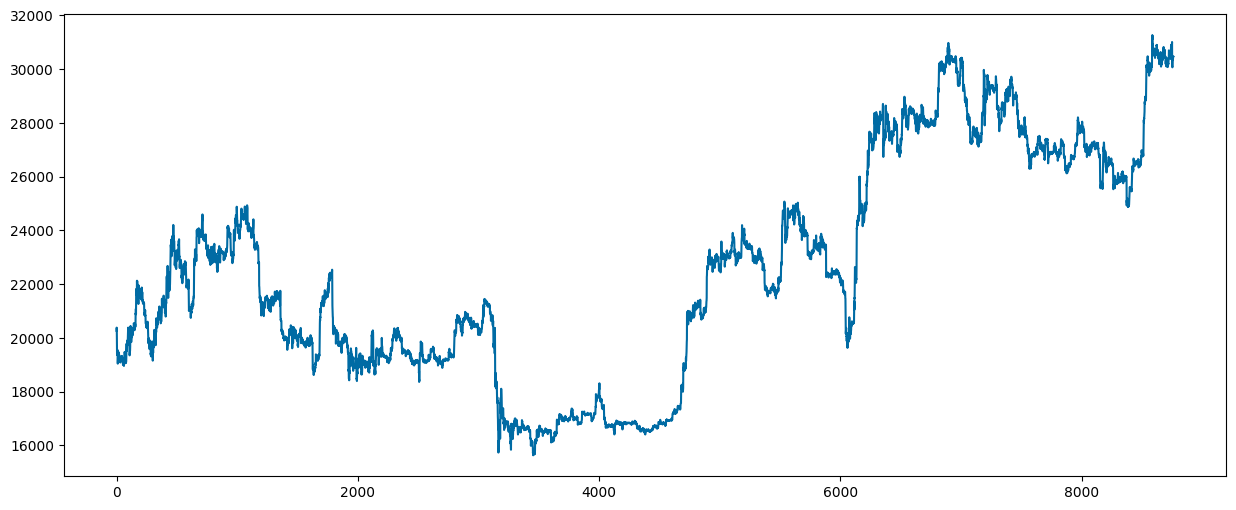

In [4]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['close'], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

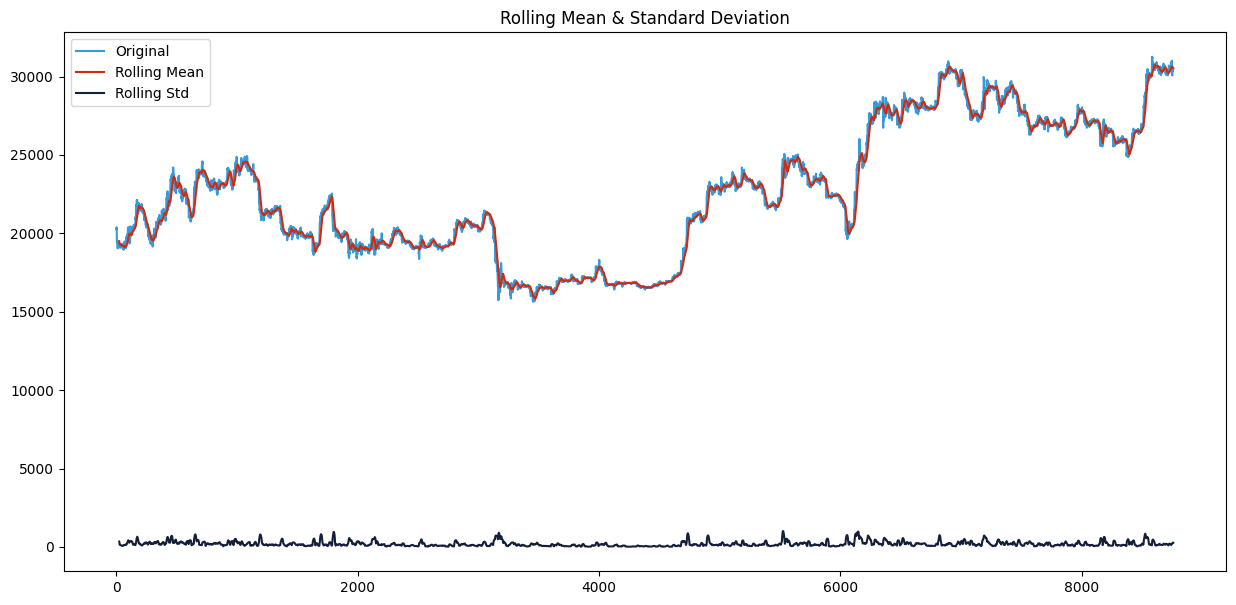

In [5]:
#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df["close"], color='#379BDB', label='Original')
plt.plot(df["close"].rolling(window=24).mean(), color='#D22A0D', label='Rolling Mean')
plt.plot(df["close"].rolling(window=24).std(), color='#142039', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

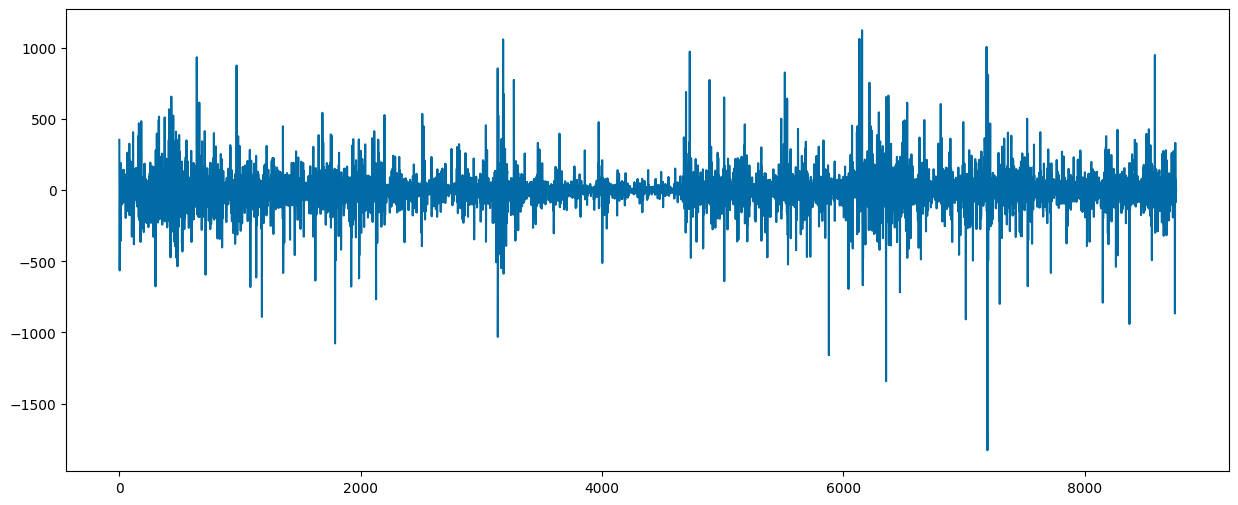

In [6]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['hourly_return'], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

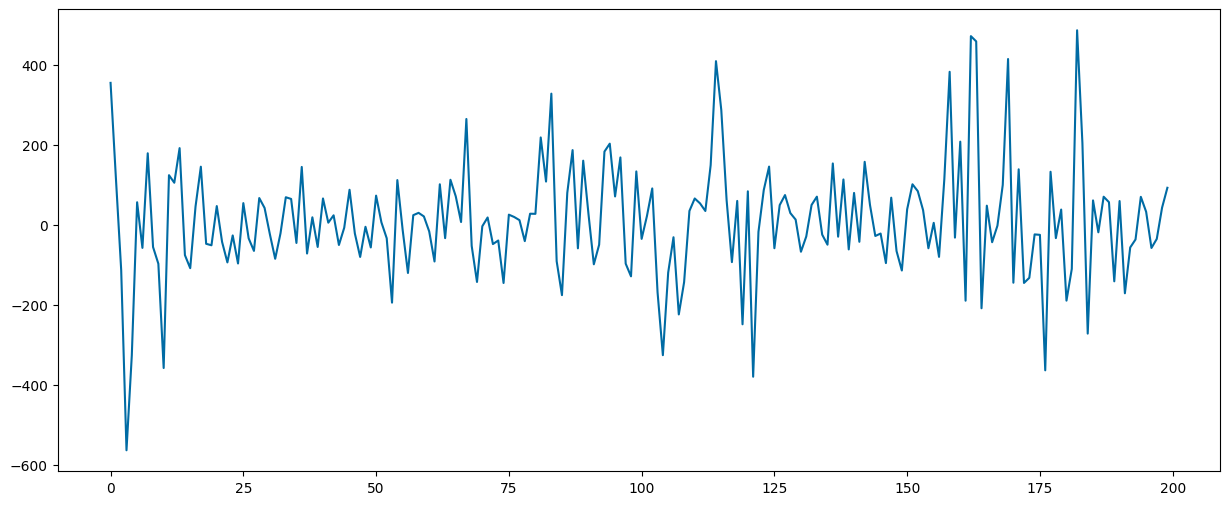

In [7]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['hourly_return'][0:200], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

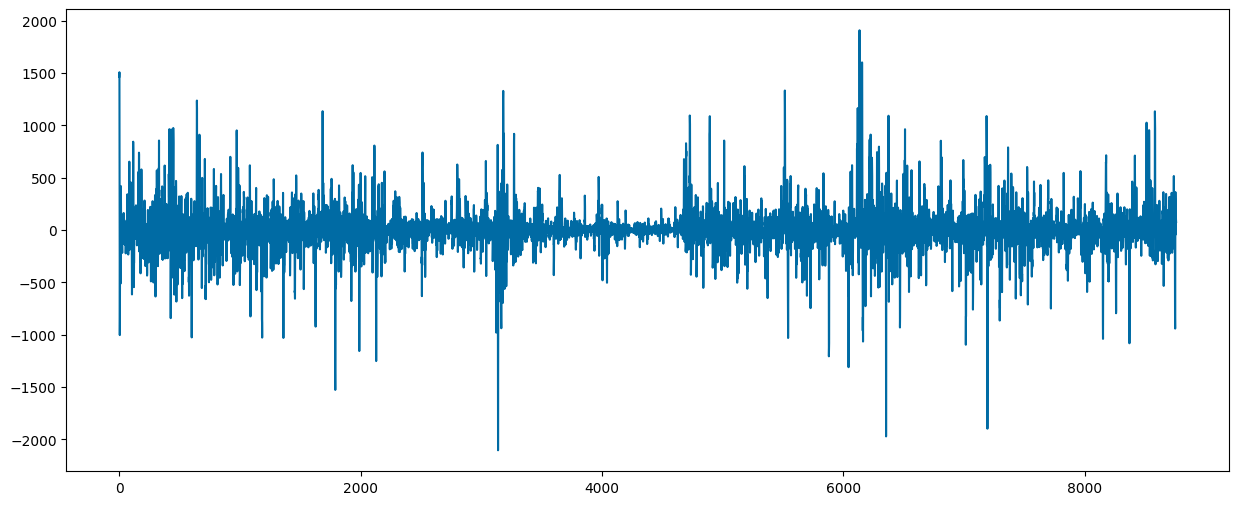

In [8]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['3_hourly_return'], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

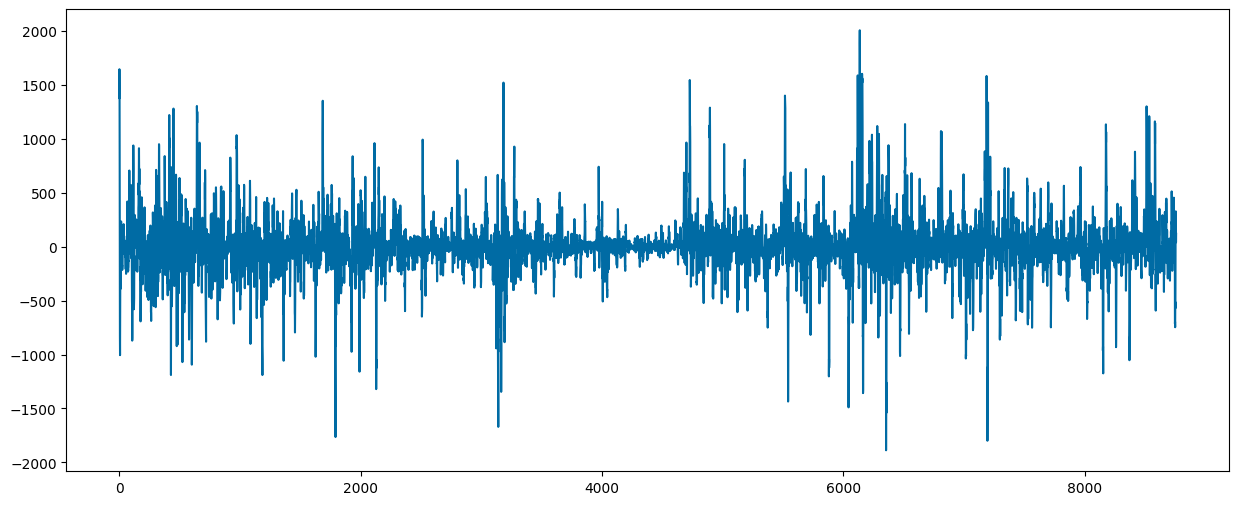

In [9]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['5_hourly_return'], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

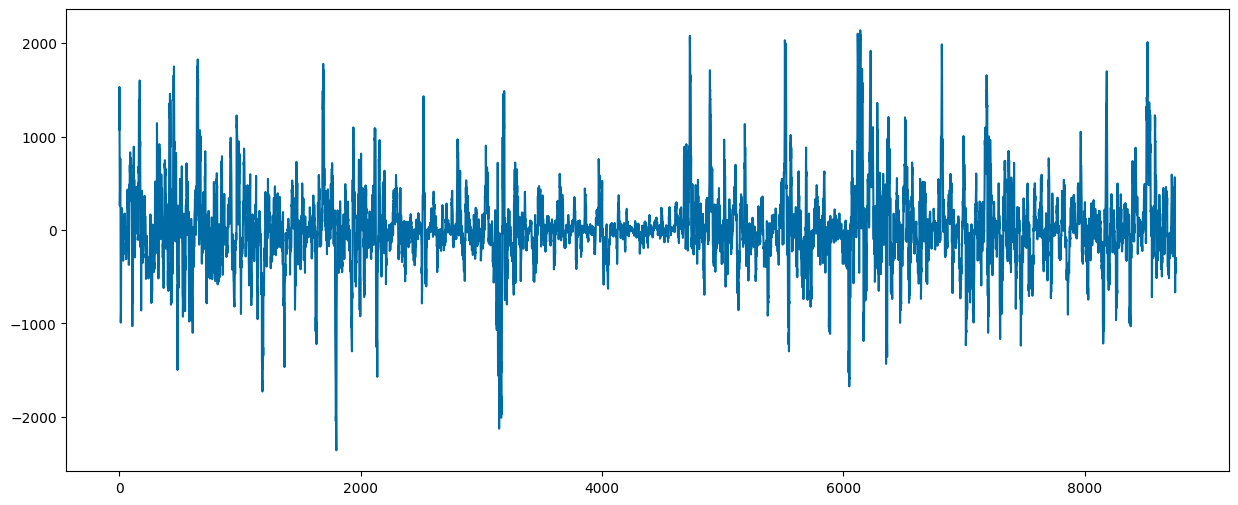

In [10]:
plt.figure(figsize=(15,6), dpi = 100) 
plt.plot(df['12_hourly_return'], linestyle = 'solid') #solid, dashed, dashdot, dotted
plt.show()

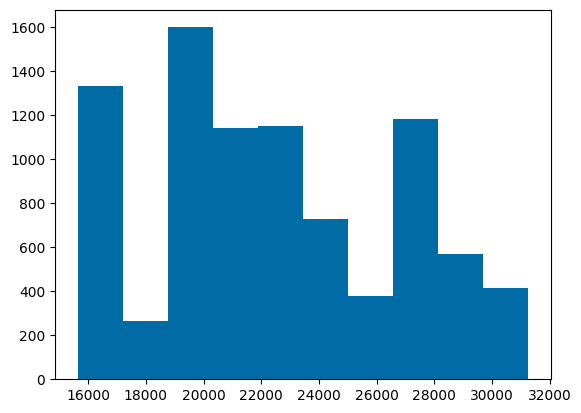

In [11]:
plt.hist(df['close'])
plt.show()

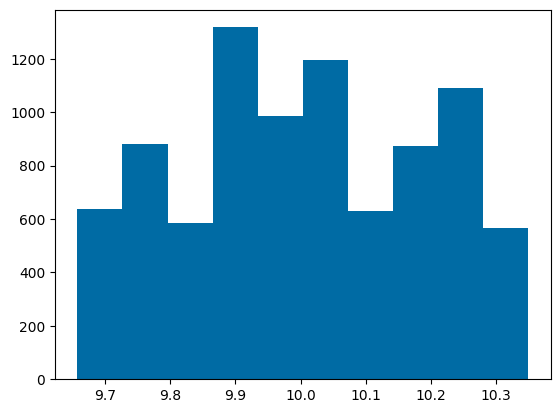

In [12]:
plt.hist(np.log(df['close']))
plt.show()

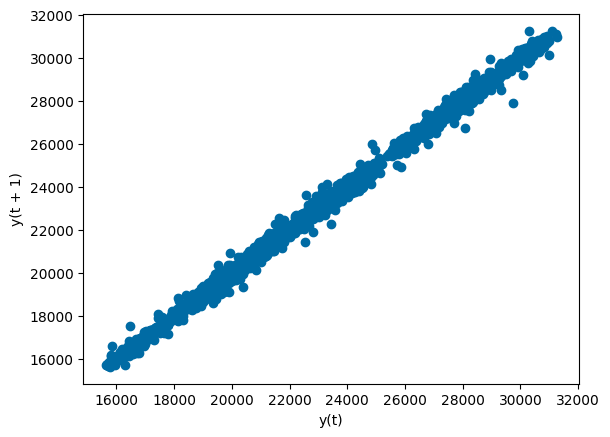

In [13]:
from pandas.plotting import lag_plot

lag_plot(df['close'])
plt.show()

In [14]:
# Checking auto-correlation
from pandas import concat

btc_price = df['close']
dataframe = concat([btc_price.shift(1), btc_price], axis=1)
dataframe.columns = ['t', 't+1']
result = dataframe.corr()
result

t       t+1
t    1.000000  0.999552
t+1  0.999552  1.000000

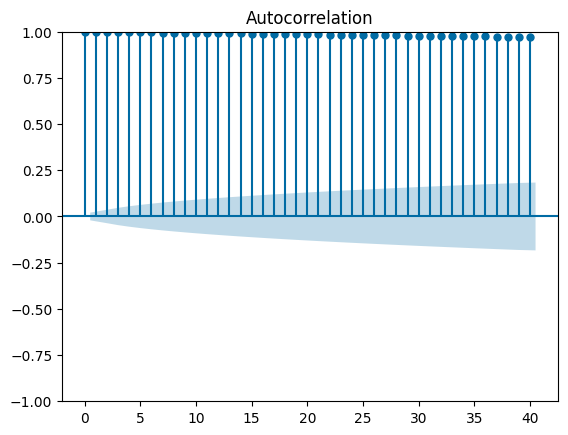

In [15]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['close'])
plt.show()

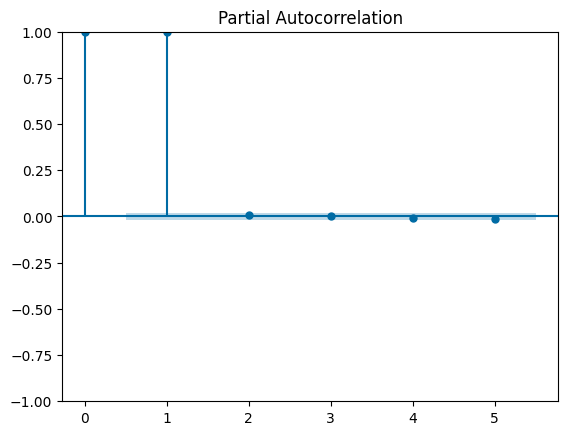

In [16]:
plot_pacf(df['close'], lags=5)
plt.show()

In [17]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['close'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                   -0.990245
p-value                           0.756806
#Lags Used                       25.000000
Number of Observations Used    8734.000000
Critical Value (1%)              -3.431099
Critical Value (5%)              -2.861871
Critical Value (10%)             -2.566946
dtype: float64


In [18]:
from statsmodels.tsa.stattools import adfuller

results = adfuller(df['close'])

print(f"ADF Statistic: {results[0]}")
print(f"p-value: {results[1]}")
print("Critical Values:")
for key, value in results[4].items():
    print("\t%s: %.3f" % (key, value))

ADF Statistic: -0.9902448747887549
p-value: 0.756805609667319
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


In [19]:
# create a differenced time series
def difference(dataset):
    diff = list()
    for i in range(1, len(dataset)):
        value = dataset[i] - dataset[i - 1]
        diff.append(value)
    return pd.Series(diff)

In [20]:
# difference data
stationary = difference(df['close'])

In [21]:
stationary

0       117.48
1      -113.28
2      -563.54
3      -326.35
4        55.98
         ...  
8754     25.80
8755     17.83
8756     74.79
8757      8.59
8758     -6.94
Length: 8759, dtype: float64

In [22]:
#Augmented Dickey–Fuller test for differenced data:
print('Results of Dickey Fuller Test:')
dftest = adfuller(stationary, autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test:
Test Statistic                -1.788298e+01
p-value                        2.997504e-30
#Lags Used                     2.400000e+01
Number of Observations Used    8.734000e+03
Critical Value (1%)           -3.431099e+00
Critical Value (5%)           -2.861871e+00
Critical Value (10%)          -2.566946e+00
dtype: float64


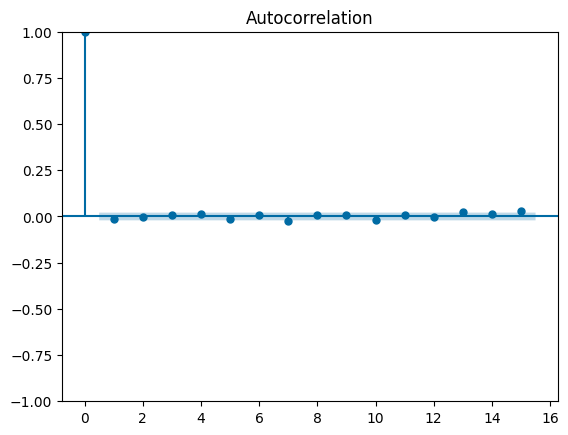

In [23]:
plot_acf(stationary, lags=15, ax=plt.gca())
plt.show()

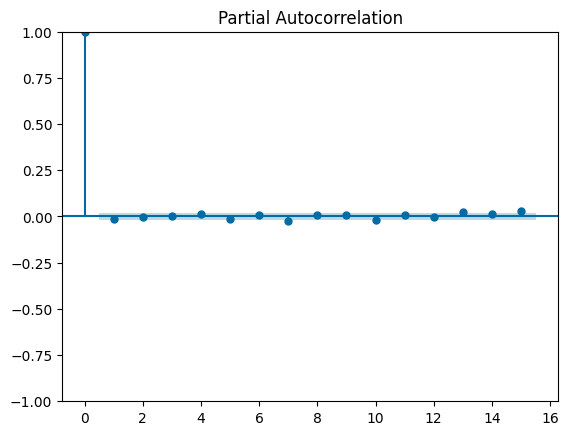

In [24]:
plot_pacf(stationary, lags=15, ax=plt.gca())
plt.show()

 If the PACF displays a sharp cutoff while the ACF decays more slowly (i.e., has significant spikes at higher lags), we say that the stationarized series displays an "AR signature," meaning that the autocorrelation pattern can be explained more easily by adding AR terms than by adding MA terms. You will probably find that an AR signature is commonly associated with positive autocorrelation at lag 1--i.e., it tends to arise in series which are slightly underdifferenced.
 
  If the PACF of the differenced series displays a sharp cutoff and/or the lag-1 autocorrelation is positive--i.e., if the series appears slightly "underdifferenced"--then consider adding an AR term to the model. The lag at which the PACF cuts off is the indicated number of AR terms.

### Variance ratio test

In [25]:
from arch.unitroot import VarianceRatio

#data = np.log(df['close'])
data = df['close'].values
vr = VarianceRatio(data, lags=2)
print("{0:0.4f}".format(vr.pvalue))

0.5011


### Transformation

In [26]:
df.head()

datetime      high       low      open  volumefrom  \
0  2022-07-01 00:00:00  20817.65  19647.29  19908.49     6823.65   
1  2022-07-01 01:00:00  20444.21  20231.53  20262.66     3183.32   
2  2022-07-01 02:00:00  20504.52  20238.04  20380.14     2262.26   
3  2022-07-01 03:00:00  20276.63  19668.22  20266.86     3603.45   
4  2022-07-01 04:00:00  19713.40  19352.87  19703.32     3932.58   

       volumeto     close  hourly_volume  top_tier_volume_quote  \
0  1.381081e+08  20262.66      143641.30           1.413396e+08   
1  6.471331e+07  20380.14       64012.17           6.423249e+07   
2  4.603065e+07  20266.86       48773.36           4.844529e+07   
3  7.212081e+07  19703.32       65925.93           5.869008e+07   
4  7.685356e+07  19376.97       84503.60           7.795704e+07   

   top_tier_volume_base  top_tier_volume_total  cccagg_volume_quote  \
0          1.734342e+09           1.875681e+09         1.023345e+08   
1          8.010797e+08           8.653122e+08         4.611965e+07   
2          5.490071e+08           5.974524e+08         3.446238e+07   
3          8.222572e+08           8.809473e+08         4.438665e+07   
4          2.074082e+09           2.152039e+09         5.267009e+07   

   cccagg_volume_base  cccagg_volume_total  total_volume_quote  \
0        1.014878e+09         1.117212e+09        1.706061e+08   
1        4.423495e+08         4.884692e+08        8.518715e+07   
2        3.276693e+08         3.621317e+08        7.538542e+07   
3        4.956181e+08         5.400048e+08        7.742932e+07   
4        6.085733e+08         6.612434e+08        1.007285e+08   

   total_volume_base  total_volume_total  eth_open  eth_close  bnb_open  \
0       1.915078e+09        2.085684e+09   1069.53    1093.82    219.48   
1       8.941570e+08        9.793442e+08   1093.82    1095.07    222.58   
2       6.256688e+08        7.010542e+08   1095.07    1091.22    225.22   
3       9.239673e+08        1.001397e+09   1091.22    1053.55    225.60   
4       2.285414e+09        2.386143e+09   1053.55    1048.59    220.97   

   bnb_close  usdt_open  usdt_close  sol_open  sol_close  hourly_return  \
0     222.58     0.9992      0.9987     33.74      34.44         354.17   
1     225.22     0.9987      0.9985     34.44      34.87         117.48   
2     225.60     0.9985      0.9982     34.87      34.77        -113.28   
3     220.97     0.9982      0.9980     34.77      33.61        -563.54   
4     219.20     0.9980      0.9981     33.61      32.55        -326.35   

   3_hourly_return  5_hourly_return  12_hourly_return  3_hourly_volatility  \
0          1464.85          1379.49           1072.73           493.599288   
1          1506.73          1646.43           1531.40           476.384009   
2           358.37          1469.05           1165.98           233.731269   
3          -559.34           829.91            583.05           346.355426   
4         -1003.17          -531.52            257.76           225.237648   

   5_hourly_volatility  12_hourly_volatility  daily_volatility  trend_score  \
0           460.540694            348.583077        286.091957        100.0   
1           411.796784            321.143744        286.846382        113.0   
2           446.529586            325.557403        287.855508         92.0   
3           592.302312            377.555379        310.682042         90.0   
4           360.433506            392.813183        317.146276         97.0   

   Pos_score  Neg_score  Compound_score  Polarity  time_of_the_day     day  \
0   0.090867   0.064867        0.115550       0.0              0.0  Friday   
1   0.098000   0.066744        0.034856       0.0              1.0  Friday   
2   0.132773   0.042909        0.103223       0.0              2.0  Friday   
3   0.109960   0.044840        0.166612       0.0              3.0  Friday   
4   0.093640   0.058400        0.132120       0.0              4.0  Friday   

   day_of_month  weekend  
0             1        0  
1        

In [27]:
cols_to_ordinal = ['day']

In [28]:
# Perform ordinal encoding for remaining columns

# Import OrdinalEncoder from sklearn packages
from sklearn.preprocessing import OrdinalEncoder 

# Create encoder object
enc = OrdinalEncoder()

# Fit encoder object with columns which are to transformed
df[cols_to_ordinal] = enc.fit_transform(df[cols_to_ordinal])

<Axes: >

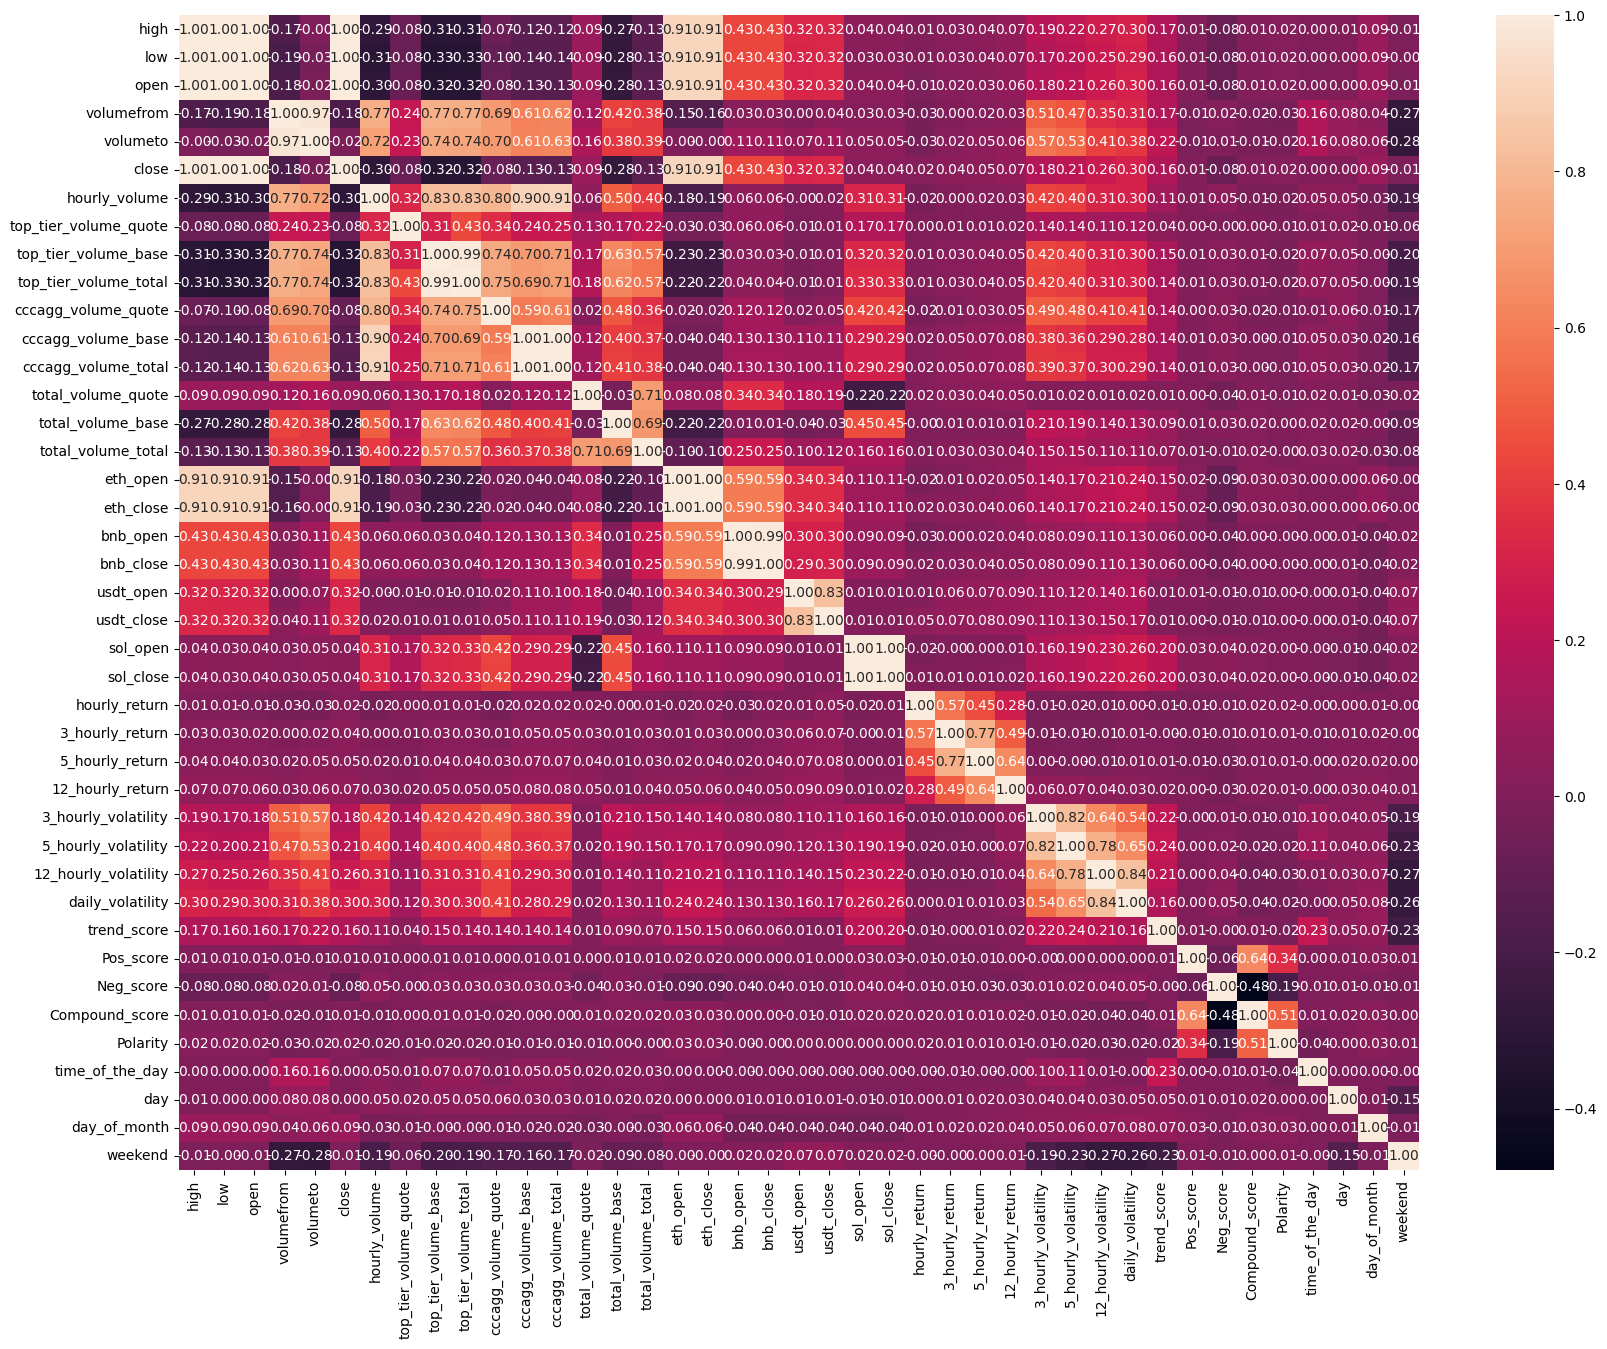

In [29]:
# Create correlation matrix heat map to check multi-collinearity between columns.

plt.figure(figsize = (20,15), dpi = 100)
sns.heatmap(df.corr(), annot = True, fmt = '.2f')

### Split Data

In [30]:
df1 = df.drop('datetime', axis = 1)

train = df1.iloc[:len(df1.index)-500]
test = df1.iloc[len(df1.index)-500:]
test.reset_index(drop = True, inplace = True)

In [31]:
X_TRAIN = train.drop('close', axis = 1)
Y_TRAIN = train[['close']]
X_TEST = test.drop('close', axis = 1)
Y_TEST = test[['close']]

In [32]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

scalerX = RobustScaler()
X_TRAIN = scalerX.fit_transform(X_TRAIN)
X_TEST = scalerX.transform(X_TEST)

### Defining metrics

In [33]:
# MAPE
import statistics
from sklearn.metrics import mean_squared_error, r2_score

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    error_ = []
    for ii in range(len(actual)):
        absolute_errors = abs((actual[ii] - pred[ii]) / actual[ii])
        error_.append(absolute_errors)
    
    mape = (sum(error_)/len(error_)) * 100.0

    return mape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

### Function for running models in CV

In [34]:
from sklearn.model_selection import TimeSeriesSplit

def cv_training(data, model, splits):
    tscv = TimeSeriesSplit(n_splits = splits)
    all_errors = []
    for train_index, test_index in tscv.split(data):
        cv_train, cv_test = data.iloc[train_index], data.iloc[test_index]

        x_train = cv_train.drop('close', axis = 1)
        y_train = cv_train[['close']]
        x_test = cv_test.drop('close', axis = 1)
        y_test = cv_test[['close']]
        
        scalerX = MinMaxScaler()
        x_train = scalerX.fit_transform(x_train)
        x_test = scalerX.transform(x_test)

        model.fit(x_train, y_train)
        pred = model.predict(x_test)

        epoch_error = rmse(y_test, pred)
        all_errors.append(epoch_error)

    return np.mean(all_errors)

### Persistence model (baseline model)

In [35]:
# persistence model
def model_persistence(x):
    return x

In [36]:
# create lagged dataset
target_values = df['close']
univariate_df = concat([target_values.shift(1), target_values], axis=1)
univariate_df.columns = ['t', 't+1']

# split into train and test sets
X = univariate_df.values
train, test = X[1:len(X)-500], X[len(X)-500:]
train_X, train_y = train[:,0], train[:,1]
test_X, test_y = test[:,0], test[:,1]

In [37]:
# walk-forward validation
predictions = []

for x in test_X:
    yhat = model_persistence(x)
    predictions.append(yhat)
    
base_error = rmse(test_y, np.array(predictions))
print('Test RMSE: %.3f' % base_error)

Test RMSE: 132.690


In [38]:
rmse_error = rmse(test_y, np.array(predictions))
mape_error = MAPE(test_y, np.array(predictions))
r2 = r2_score(test_y, np.array(predictions))

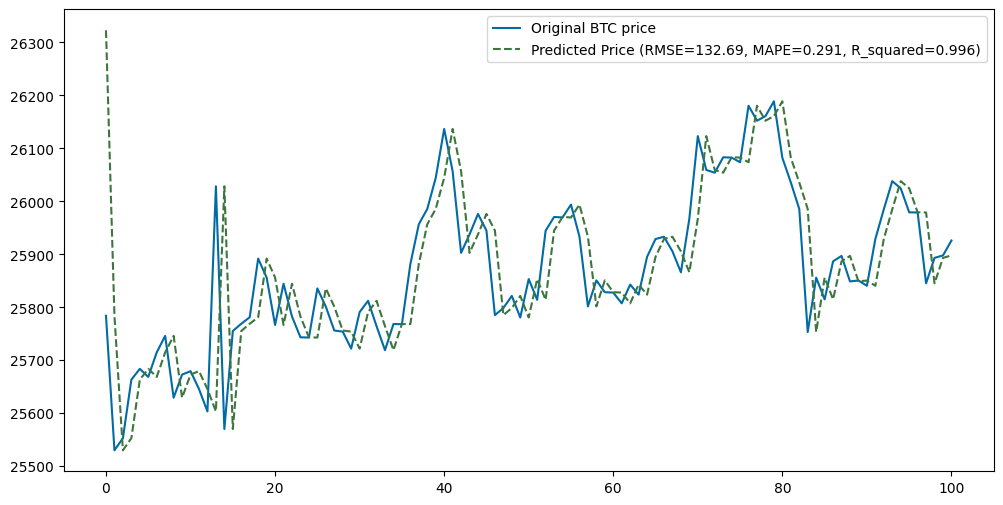

In [39]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y[0:101], label = 'Original BTC price');
ax.plot(predictions[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

### ARIMA Model

In [46]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((8259,), (8259,), (500,), (500,))

In [52]:
# Forecasting using SARIMA on roling basis
train_set = [x for x in train_X]
history = [y for y in train_y]
predictions = []

for t in range(len(test_X)):
    model = ARIMA(history, order=(0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    predictions.append(output[0])
    obs = test_X[t]
    history.append(obs)

In [49]:
rmse_error = rmse(test_y, np.array(predictions))
mape_error = MAPE(test_y, np.array(predictions))
r2 = r2_score(test_y, np.array(predictions))

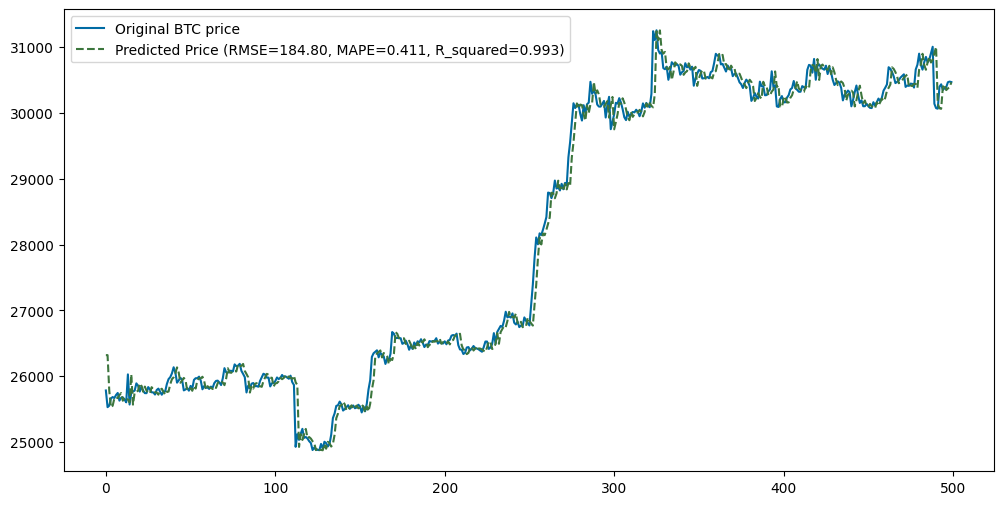

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y, label = 'Original BTC price');
ax.plot(predictions, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

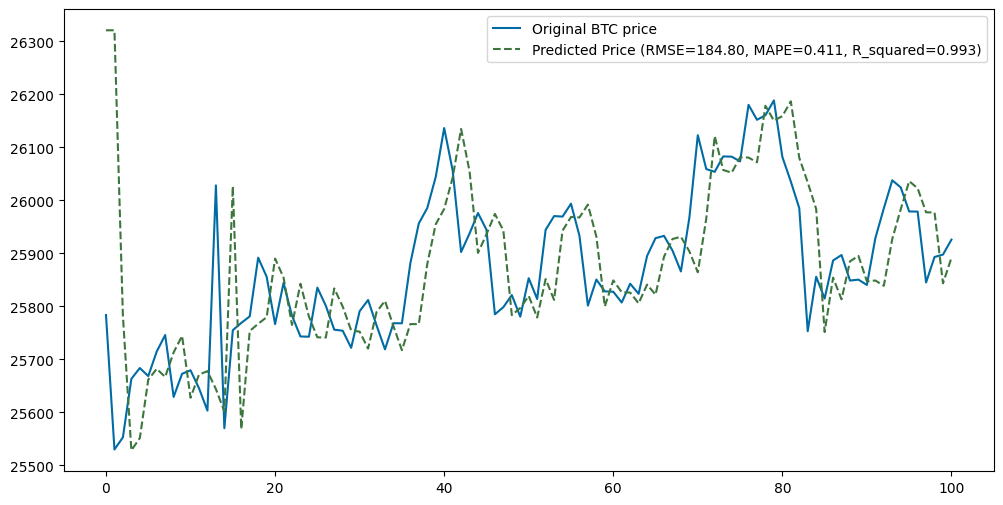

In [51]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y[0:101], label = 'Original BTC price');
ax.plot(predictions[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

### SARIMA

In [57]:
# Seasonal - fit stepwise auto-ARIMA
SARIMA_model = pm.auto_arima(Y_TRAIN, start_p = 0, start_q = 0,
                         test = 'adf',
                         max_p = 5, max_q = 2, 
                         m = 3, #3 is the frequncy of the cycle
                         start_P = 0, 
                         seasonal = True, #set to seasonal
                         d = None, 
                         D = 1, #order of the seasonal differencing
                         trace = False,
                         error_action = 'ignore',  
                         suppress_warnings = True, 
                         stepwise = True)

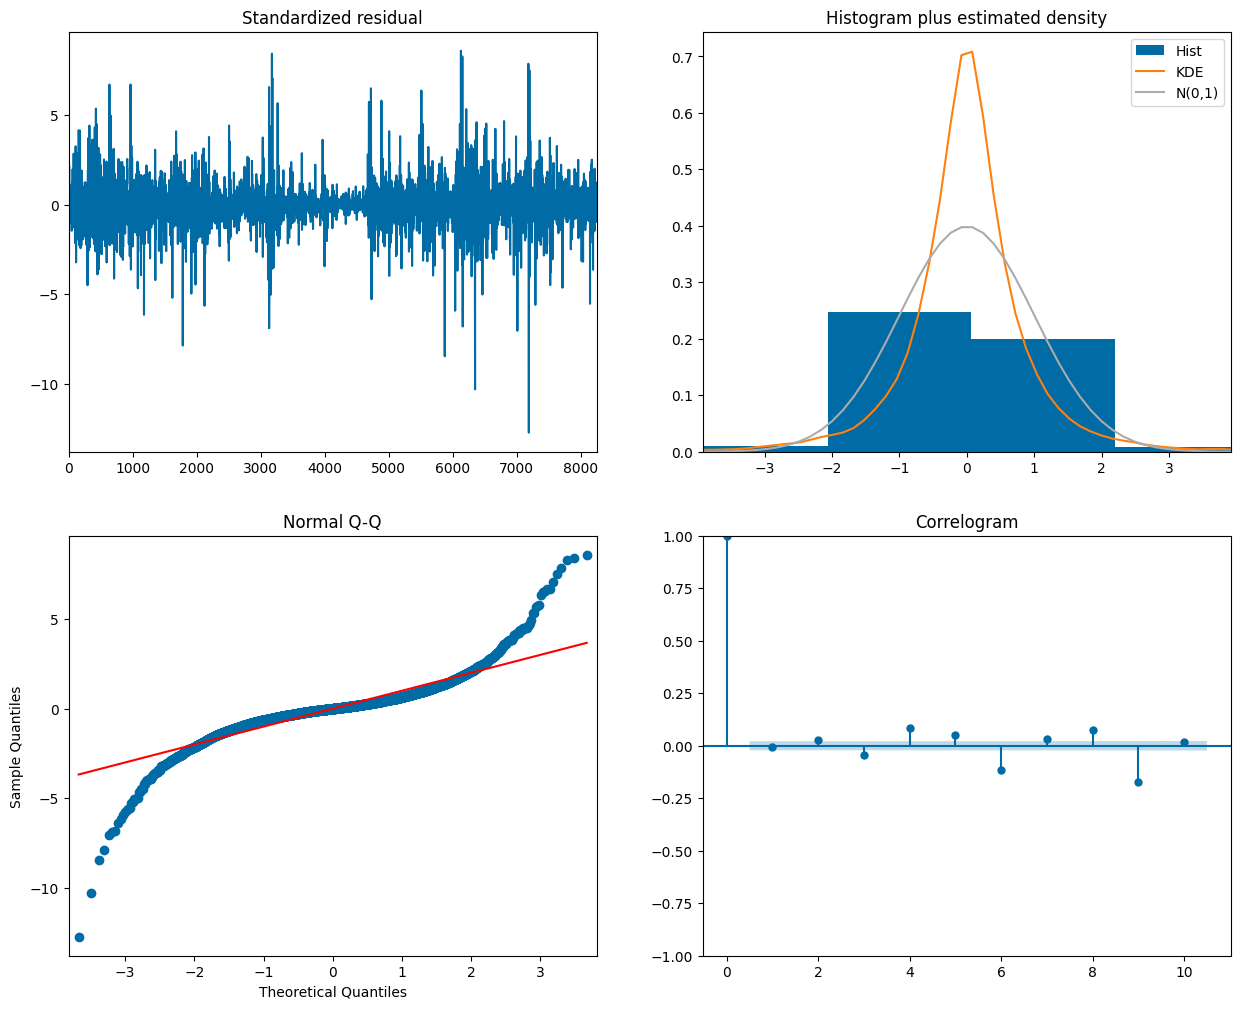

In [58]:
SARIMA_model.plot_diagnostics(figsize=(15,12))
plt.show()

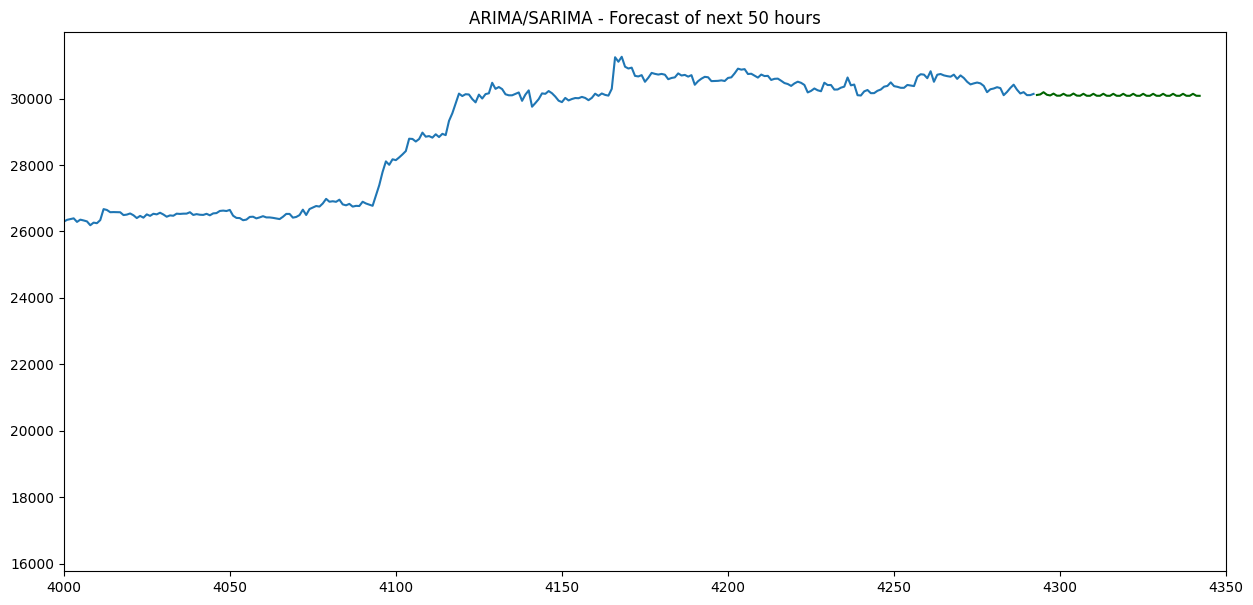

In [34]:
forecast(SARIMA_model, 50)

In [59]:
# ARIMA hyper tuning
from statsmodels.tsa.arima.model import ARIMA

history = [x for x in train_X]
best_error = 0
parameters = ()

for p in range(0,4):
    for d in range(1,2):
        for q in range(0,2):
            predictions = []

            for t in range(len(test_X)):
                model = ARIMA(history, order=(p,d,q))
                model_fit = model.fit()
                output = model_fit.forecast()
                yhat = output[0]
                predictions.append(yhat)
                obs = test_X[t]
                history.append(obs)

            errors = np.sqrt(mean_squared_error(test_X, np.array(predictions)))
            params = (p,d,q)
            try:
                if best_error == 0:
                    best_error = errors
                else:
                    if errors < best_error:
                        best_error = errors
                        parameters = params
            except:
                pass
            
            print("ARIMA : ", str((p,d,q)), " RMSE : ", errors)
            
print("Best ARIMA : ", str((p,d,q)), " RMSE : ", best_error)

ARIMA :  (0, 1, 0)  RMSE :  132.6896647738624
ARIMA :  (0, 1, 1)  RMSE :  228.637350338775
ARIMA :  (1, 1, 0)  RMSE :  228.37570958251618
ARIMA :  (1, 1, 1)  RMSE :  228.14151832418258
ARIMA :  (2, 1, 0)  RMSE :  227.9478211547442
ARIMA :  (2, 1, 1)  RMSE :  227.89465611146545
ARIMA :  (3, 1, 0)  RMSE :  227.68268572795037
ARIMA :  (3, 1, 1)  RMSE :  227.64254163086068
Best ARIMA :  (3, 1, 1)  RMSE :  132.6896647738624


It can be seen that since our data represents random walk, it cannot be predicted well with ARIMA and hence its best RMSE is 134.49 which is similar to RMSE for persistent or naive model. 

In [60]:
# Forecasting using SARIMA on roling basis
history = [x for x in Y_TRAIN.values]
predictions = []

for t in range(len(Y_TEST.values)):
    model = ARIMA(history, order = (0,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = np.array(Y_TEST)[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))

errors = mean_squared_error(Y_TEST, np.array(predictions))
print('Test RMSE: %.3f' % np.sqrt(errors))

Test RMSE: 132.690


In [62]:
rmse_error = rmse(Y_TEST, np.array(predictions))
mape_error = MAPE(Y_TEST.values, np.array(predictions))
r2 = r2_score(Y_TEST, np.array(predictions))

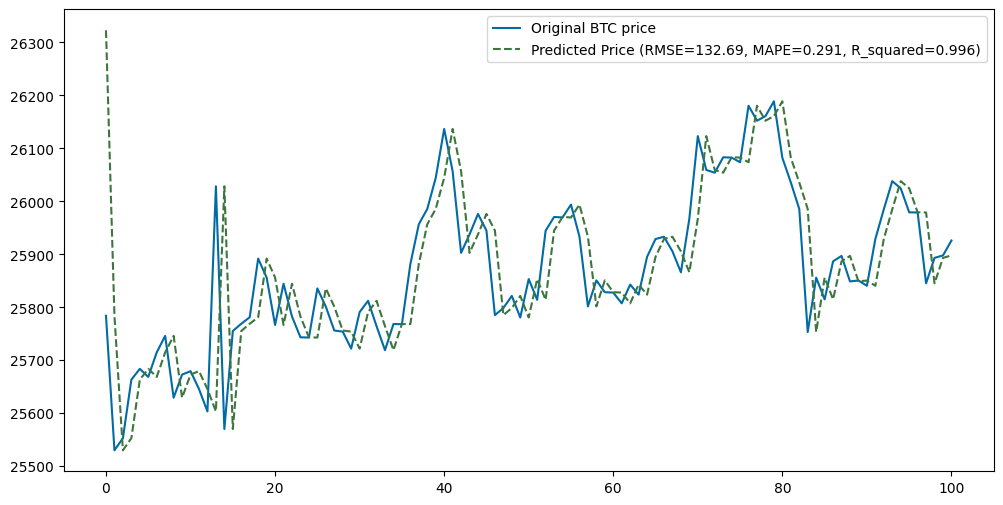

In [63]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y[0:101], label = 'Original BTC price');
ax.plot(predictions[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

### SARIMAX

In [65]:
df.columns

Index(['datetime', 'high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'hourly_volume', 'top_tier_volume_quote', 'top_tier_volume_base',
       'top_tier_volume_total', 'cccagg_volume_quote', 'cccagg_volume_base',
       'cccagg_volume_total', 'total_volume_quote', 'total_volume_base',
       'total_volume_total', 'eth_open', 'eth_close', 'bnb_open', 'bnb_close',
       'usdt_open', 'usdt_close', 'sol_open', 'sol_close', 'hourly_return',
       '3_hourly_return', '5_hourly_return', '12_hourly_return',
       '3_hourly_volatility', '5_hourly_volatility', '12_hourly_volatility',
       'daily_volatility', 'trend_score', 'Pos_score', 'Neg_score',
       'Compound_score', 'Polarity', 'time_of_the_day', 'day', 'day_of_month',
       'weekend'],
      dtype='object')

In [66]:
exo = df[['high', 'low', 'open', 'volumefrom', 'volumeto']]

In [68]:
# Seasonal - fit stepwise auto-ARIMA
SARIMAX_model = pm.auto_arima(Y_TRAIN, exogenous = exo,
                              start_p = 0, start_q = 0,
                              test = 'adf',
                              max_p = 5, max_q = 2, 
                              m = 3, #3 is the frequncy of the cycle
                              start_P = 0, 
                              seasonal = True, #set to seasonal
                              d = None, 
                              D = 1, #order of the seasonal differencing
                              trace = False,
                              error_action = 'ignore',  
                              suppress_warnings = True, 
                              stepwise = True)

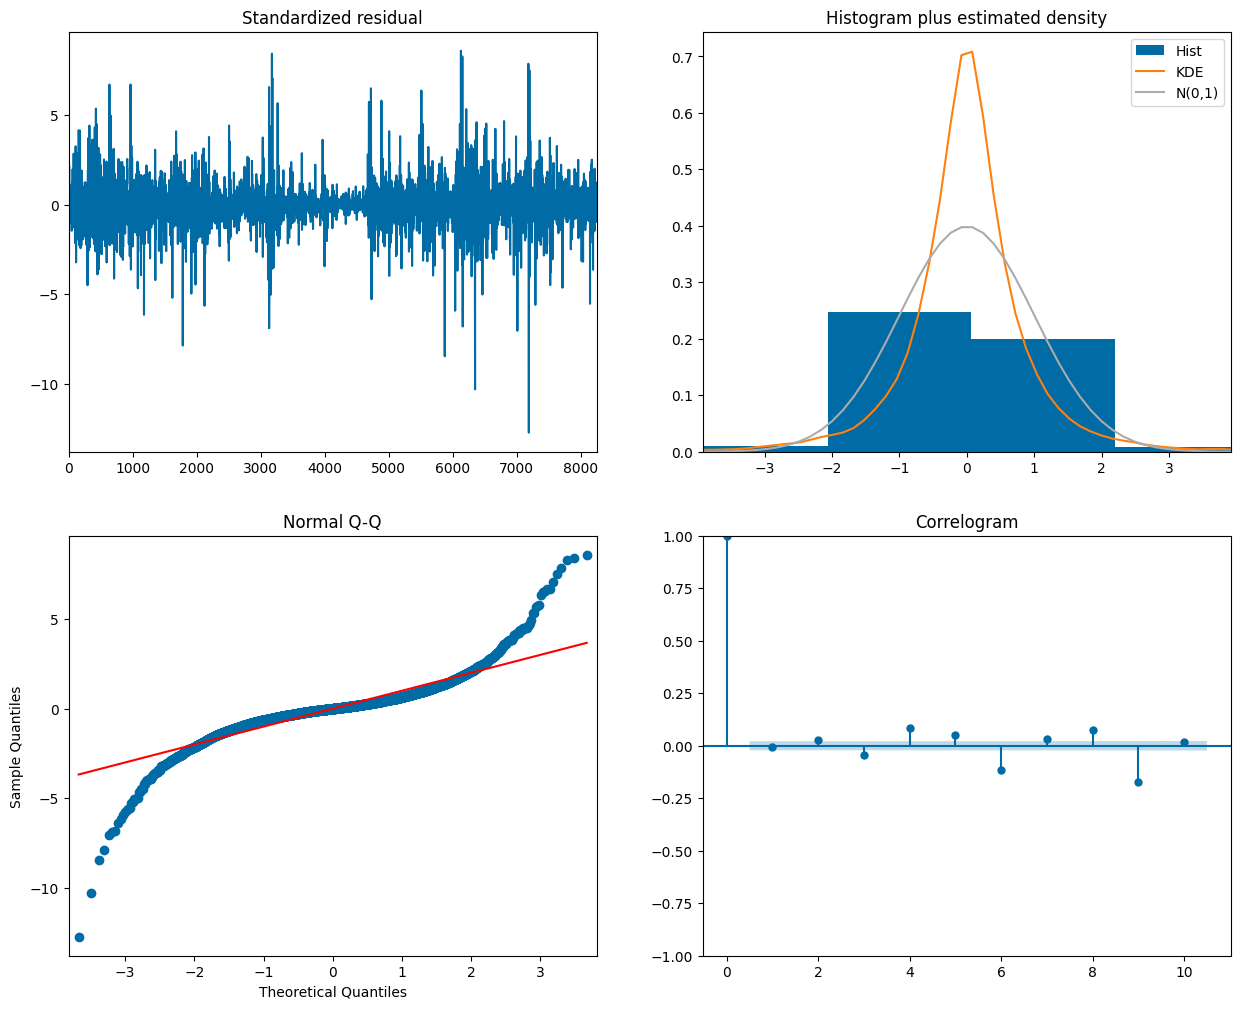

In [69]:
SARIMAX_model.plot_diagnostics(figsize=(15,12))
plt.show()

In [82]:
# Forecasting using SARIMAX on roling basis
train_ = df[['close']].loc[:len(df.index) - 500]
test_ = df[['close']].loc[len(df.index) - 500:]
history = [y for y in train_.values]
predictions = []

for t in range(len(test_.index)-1):
    model = pm.auto_arima(history, d = 1, error_action='ignore', trace=True, suppress_warnings = True, maxiter = 500, m = 4,
                          stationary = False, test = 'adf')

    output = model.predict(n_periods = 1, alpha = 0.05)
    predictions.append(output)
    obs = test_['close'].values[t]
    history.append(obs)

errors = mean_squared_error(test_['close'].values, np.array(predictions))
print('Test RMSE: %.3f' % np.sqrt(errors))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=103053.547, Time=1.05 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=103044.844, Time=0.08 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=103046.330, Time=0.35 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=103046.364, Time=0.40 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=103043.085, Time=0.04 sec
 ARIMA(0,1,0)(1,0,0)[4] intercept   : AIC=103045.593, Time=0.28 sec
 ARIMA(0,1,0)(0,0,1)[4] intercept   : AIC=103045.613, Time=0.28 sec
 ARIMA(0,1,0)(1,0,1)[4] intercept   : AIC=103046.680, Time=2.05 sec
 ARIMA(1,1,0)(0,0,0)[4] intercept   : AIC=103045.573, Time=0.16 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=103045.591, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=103047.471, Time=0.22 sec

Best model:  ARIMA(0,1,0)(0,0,0)[4]          
Total fit time: 5.308 seconds


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (8262,) + inhomogeneous part.

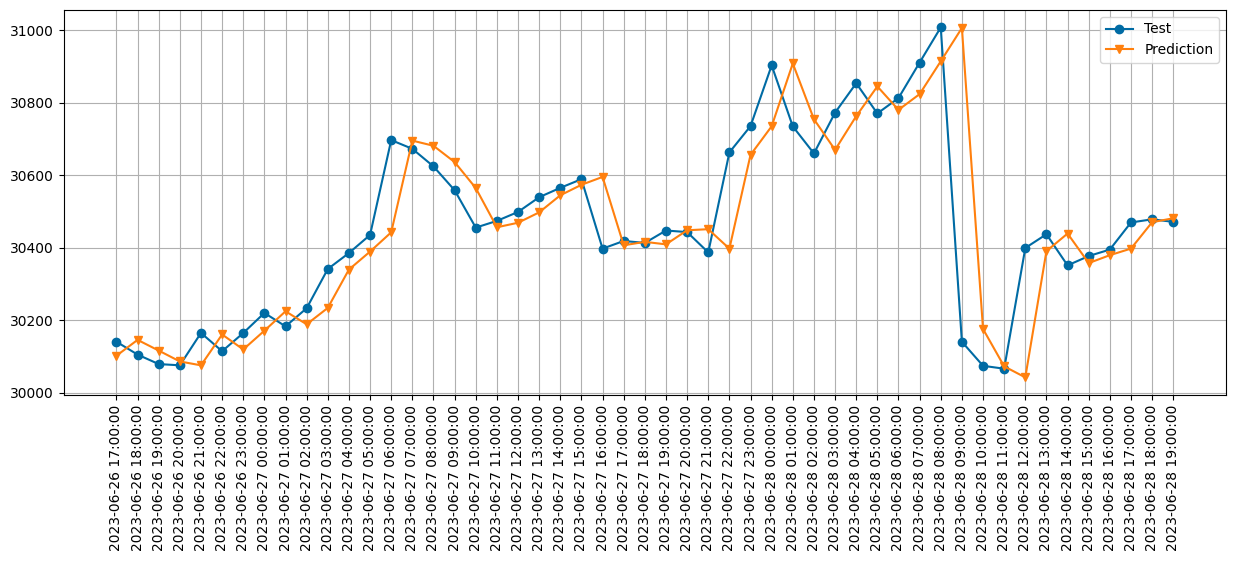

In [96]:
plt.figure(figsize=(15,5))
plt.grid()

plt.plot(train['datetime'][-51:], test['close+1'], marker='o', label='Test')
plt.plot(train['datetime'][-51:], predictions, marker='v', label='Prediction')
plt.legend()
plt.xticks(rotation=90)
plt.show()

### Multi-variate SARIMAX

In [40]:
train = df.iloc[:len(df.index) - 500]
test = df.iloc[len(df.index) - 500:]
test.reset_index(drop = True, inplace = True)

In [41]:
# Seasonal Decomposition
ts_decomposition = seasonal_decompose(x = train['close'], model = 'additive', period = 24)
trend_estimate = ts_decomposition.trend
seasonal_estimate = ts_decomposition.seasonal
residual_estimate = ts_decomposition.resid

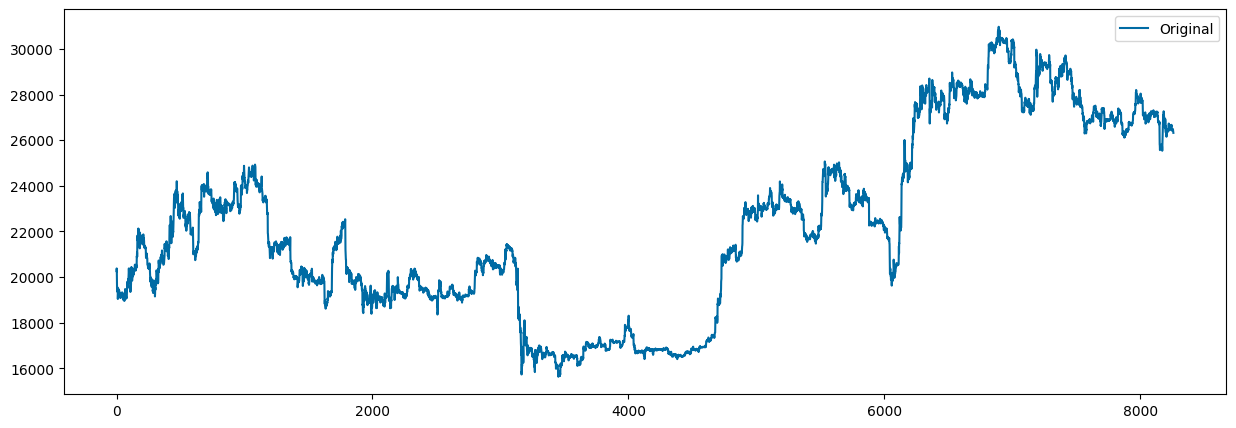

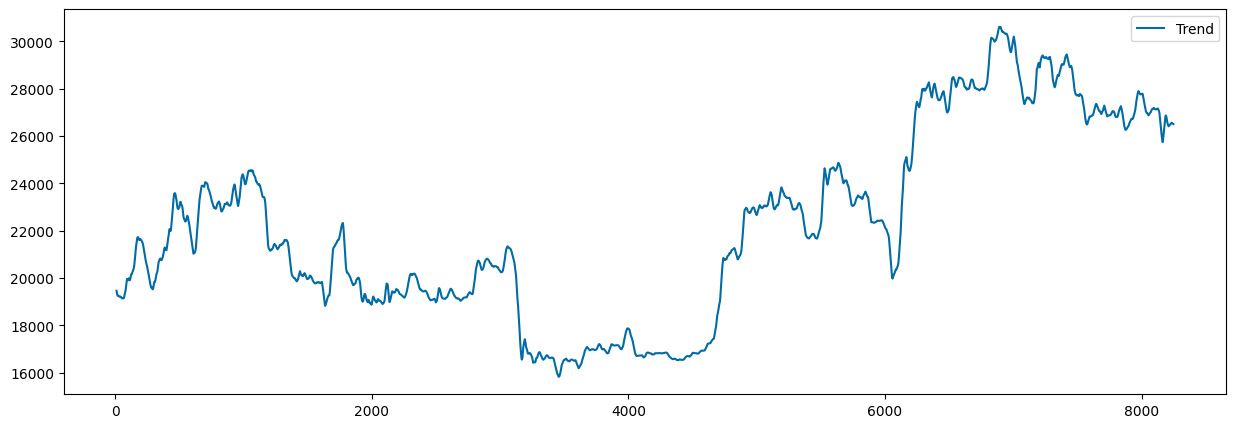

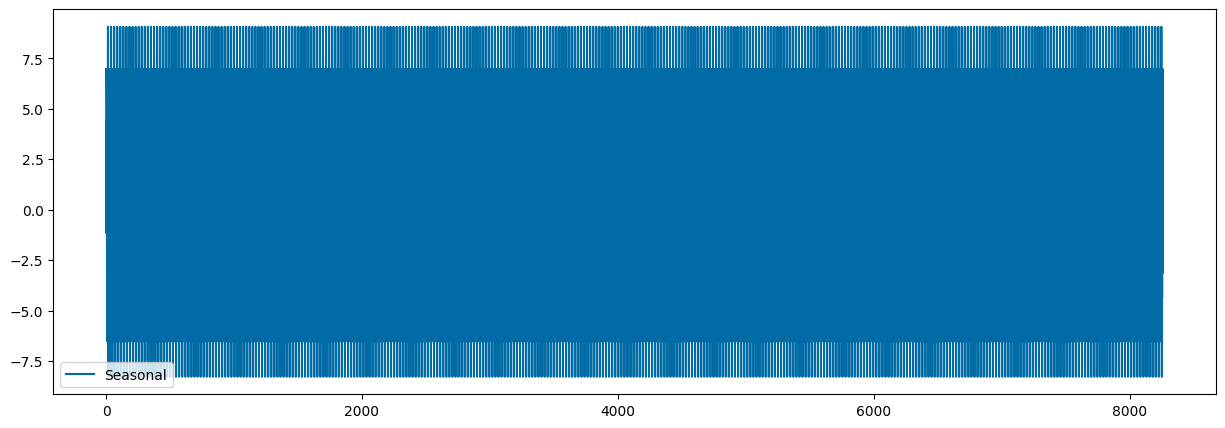

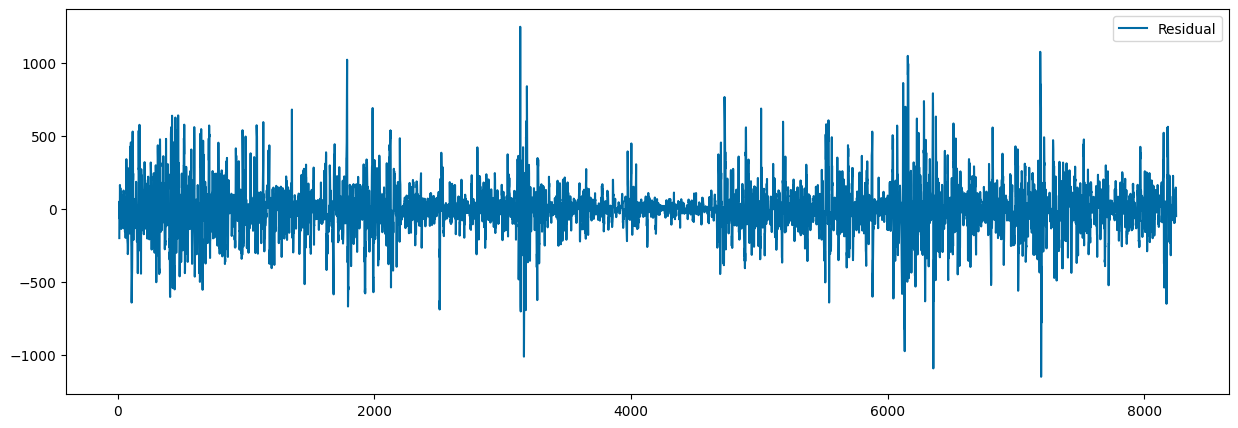

In [42]:
plt.figure(figsize=(15,5))
plt.plot(train['close'], label='Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(trend_estimate, label='Trend')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(seasonal_estimate, label='Seasonal')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(residual_estimate, label='Residual')
plt.legend()

In [43]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train['close'], X=train[['high', 'low', 'open', 'volumefrom', 'volumeto']], d = 1, error_action='ignore', trace=True,
                      suppress_warnings = True, maxiter = 500, m = 4, stationary = False, test = 'adf')

# Print out summary information on the fit
print(arima.summary())
print(arima.params)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=90917.536, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92231.255, Time=1.60 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91030.077, Time=2.77 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=90949.473, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158459.804, Time=1.37 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=90915.595, Time=4.15 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=90913.161, Time=2.78 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=90917.050, Time=4.24 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=90910.127, Time=2.61 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=90912.370, Time=3.38 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=90912.044, Time=3.78 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=90913.891, Time=4.05 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=90913.958, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=90917.275, Time=2.28 sec
 ARIMA(1,1,3)(0,0,

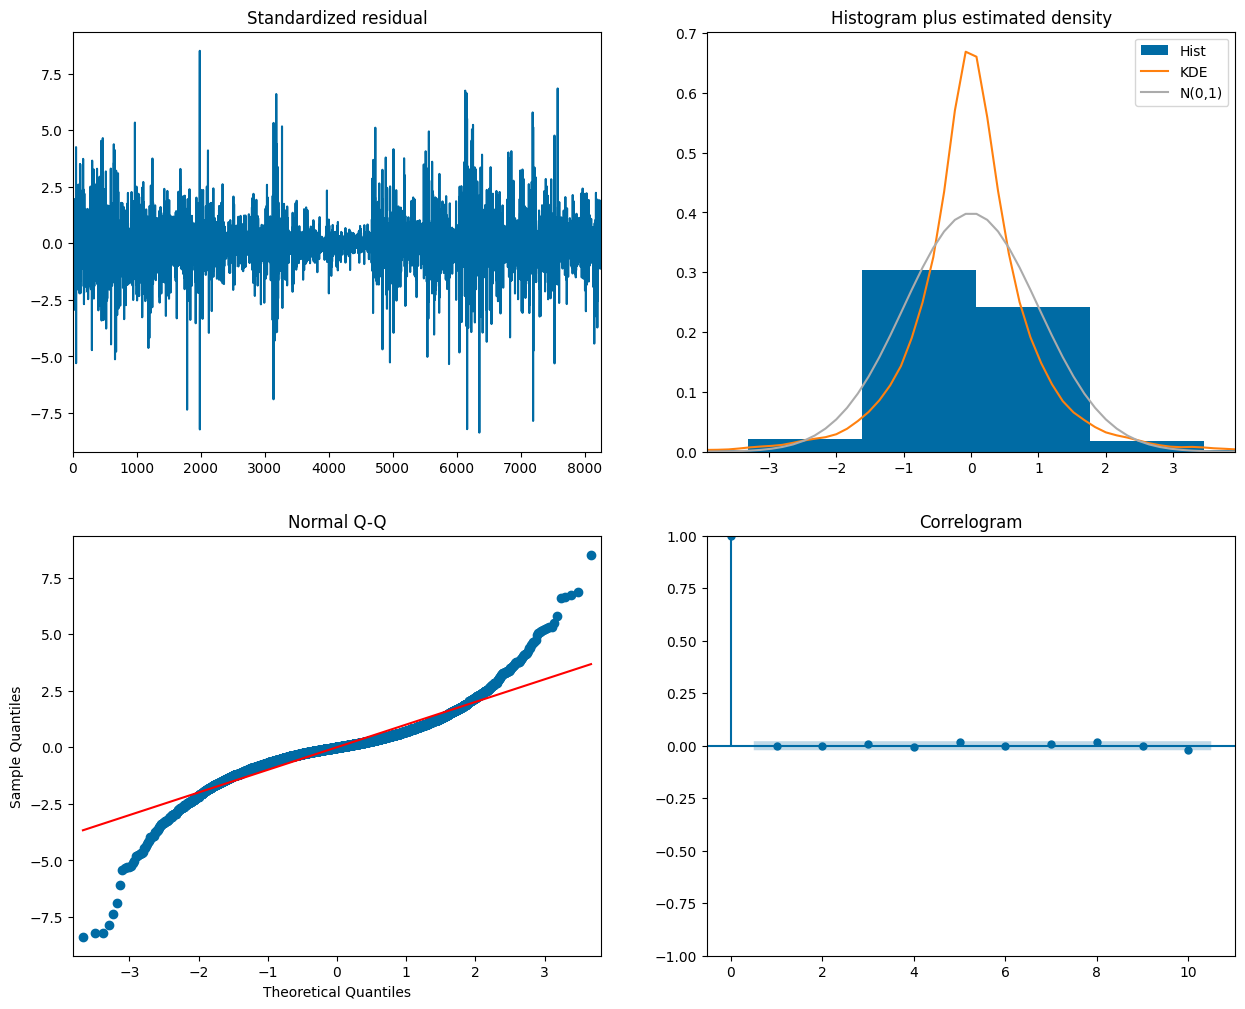

In [44]:
arima.plot_diagnostics(figsize=(15,12))
plt.show()

In [45]:
b = test[['high', 'low', 'open', 'volumefrom', 'volumeto']].values
b.shape

(500, 5)

In [89]:
# Forecasting using SARIMA on roling basis
train_set = [x for x in train[['high', 'low', 'open', 'volumefrom', 'volumeto']].values]
history = [y for y in train['close'].values]
predictions = []

for t in range(len(test.index)):
    model = pm.auto_arima(history, X = train_set, d = 1,
                      error_action='ignore', trace=True, suppress_warnings = True, maxiter = 500, m = 4,
                      stationary = False, test = 'adf')

    output = model.predict(n_periods = 1, X = test[['high', 'low', 'open', 'volumefrom', 'volumeto']].values[t:t+1], alpha = 0.05)
    predictions.append(output)
    obs = test['close'].values[t]
    history.append(obs)
    obs1 = test[['high', 'low', 'open', 'volumefrom', 'volumeto']].values[t]
    train_set.append(obs1)

errors = mean_squared_error(test['close'].values, np.array(predictions))
print('Test RMSE: %.3f' % np.sqrt(errors))

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=90917.536, Time=4.25 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92231.255, Time=1.64 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91030.077, Time=2.77 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=90949.473, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158459.804, Time=1.35 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=90915.595, Time=4.03 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=90913.161, Time=2.74 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=90917.050, Time=4.06 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=90910.127, Time=2.57 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=90912.370, Time=3.27 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=90912.044, Time=3.61 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=90913.891, Time=4.10 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=90913.958, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=90917.275, Time=2.21 sec
 ARIMA(1,1,3)(0,0,

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=90952.917, Time=2.31 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=90956.317, Time=2.26 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=90950.832, Time=2.99 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=90985.882, Time=1.94 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=90948.541, Time=2.76 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=90950.856, Time=3.09 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=90950.480, Time=4.50 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=90952.410, Time=4.82 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=90946.704, Time=2.53 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=90949.025, Time=2.72 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=90948.643, Time=3.99 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=90950.598, Time=4.45 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=90951.068, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=90949.092, Time=2.73 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=90946.568, Time=2.40

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=90981.587, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=90979.805, Time=2.83 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=90977.437, Time=2.44 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=90979.686, Time=3.34 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=90979.346, Time=3.66 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=90981.297, Time=3.70 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=90984.986, Time=2.06 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=90981.066, Time=2.54 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91014.172, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=90979.376, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=90979.491, Time=3.32 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 109.965 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=90997.748, Time=4.57 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92313.491, Time=1.62 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91028.797, Time=4.41 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92344.990, Time=1.69 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91141.285, Time=2.87 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91060.516, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158663.710, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91026.858, Time=4.17 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91024.367, Time=2.93 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91028.303, Time=4.19 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91021.353, Time=2.71 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91023.586, Time=3.47 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91023.259, Time=3.81 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91025.123, Time=4.19 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91024.987, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91028.276, Time=2.21 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91023.096, Time=3.2

 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91051.361, Time=3.62 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91053.310, Time=4.01 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91056.910, Time=2.10 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91053.013, Time=2.81 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91086.120, Time=1.93 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91051.305, Time=2.37 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91051.532, Time=3.43 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 115.290 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91072.460, Time=4.72 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92391.762, Time=1.73 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91185.446, Time=3.18 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91104.234, Time=3.45 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158746.577, Time=1.52 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91070.520, Time=4.42 sec
 ARIMA

 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91135.787, Time=3.26 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158805.991, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91102.274, Time=4.24 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91099.821, Time=2.94 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91103.661, Time=4.33 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91096.766, Time=2.68 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91098.974, Time=3.50 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91098.671, Time=3.89 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91100.538, Time=4.20 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91100.344, Time=2.43 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91103.601, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91098.615, Time=3.27 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91132.808, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91096.420, Time=2.98 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91098.695, Time=3.1

 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91163.090, Time=2.07 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91126.740, Time=3.03 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91129.014, Time=3.22 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91128.669, Time=4.62 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91130.594, Time=5.05 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91124.927, Time=2.69 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91127.208, Time=2.93 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91126.855, Time=4.20 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91128.808, Time=4.65 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91128.836, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91127.245, Time=3.04 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91124.816, Time=2.48 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91127.020, Time=3.24 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91126.719, Time=3.58 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91128.672, Time=3.85

 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91157.059, Time=3.31 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91156.763, Time=3.58 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91158.716, Time=3.79 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91162.245, Time=2.14 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91158.484, Time=2.80 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91191.388, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91156.818, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91157.095, Time=3.28 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 111.466 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91174.536, Time=4.73 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92496.030, Time=1.69 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91287.793, Time=3.00 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91206.066, Time=3.59 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158941.048, Time=1.40 sec
 ARIMA

 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91318.205, Time=2.94 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91236.496, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=158998.844, Time=1.43 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91203.002, Time=4.20 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91200.582, Time=3.06 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91204.377, Time=4.33 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91197.517, Time=2.68 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91199.716, Time=3.52 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91199.425, Time=3.82 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91201.292, Time=4.13 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91201.110, Time=2.53 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91204.363, Time=2.40 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91199.386, Time=3.25 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91233.578, Time=2.12 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91197.176, Time=2.9

 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91229.918, Time=3.22 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91264.138, Time=2.04 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91227.702, Time=3.07 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91229.979, Time=3.26 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91229.633, Time=4.62 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91231.560, Time=5.15 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91225.880, Time=2.61 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91228.163, Time=2.89 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91227.811, Time=4.12 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91229.764, Time=4.72 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91229.785, Time=2.28 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91228.204, Time=2.92 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91225.757, Time=2.48 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91227.957, Time=3.26 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91227.661, Time=3.59

 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91255.863, Time=2.67 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91258.063, Time=3.29 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91257.767, Time=3.89 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91259.721, Time=4.56 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91263.243, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91259.491, Time=2.75 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91292.458, Time=1.85 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91257.824, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91258.086, Time=3.74 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 115.105 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91275.552, Time=6.29 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92598.770, Time=1.89 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91388.881, Time=3.28 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91307.140, Time=3.94 sec
 ARIMA(

 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92629.558, Time=1.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91419.267, Time=3.10 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91337.435, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=159191.871, Time=1.50 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91303.915, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91301.504, Time=3.07 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91305.286, Time=5.10 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91298.412, Time=3.15 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91300.609, Time=3.83 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91300.321, Time=3.93 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91302.191, Time=4.26 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91302.016, Time=2.50 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91305.270, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91300.314, Time=3.27 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91334.531, Time=2.1

 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91335.952, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91330.973, Time=3.15 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91365.226, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91328.762, Time=2.92 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91331.038, Time=3.14 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91330.693, Time=4.52 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91332.619, Time=4.85 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91326.956, Time=2.61 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91329.238, Time=2.87 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91328.887, Time=4.02 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91330.840, Time=4.42 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91330.875, Time=2.19 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91329.282, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91326.829, Time=2.74 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91329.025, Time=3.53

 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91360.599, Time=2.87 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91358.141, Time=2.47 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91360.337, Time=3.23 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91360.044, Time=3.55 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91361.998, Time=3.81 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91365.604, Time=2.26 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91361.779, Time=2.69 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91394.938, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91360.127, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91360.355, Time=3.21 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.286 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91377.764, Time=4.54 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92702.312, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91491.191, Time=2.95 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91408.965, Time=4.63 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92733.148, Time=1.67 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91522.220, Time=3.00 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91440.611, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=159385.713, Time=1.46 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91407.022, Time=4.27 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91404.598, Time=2.99 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91408.395, Time=4.25 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91401.570, Time=2.79 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91403.766, Time=3.53 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91403.477, Time=3.85 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91405.339, Time=4.19 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91405.123, Time=2.50 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91408.377, Time=2.33 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91403.401, Time=3.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91437.642, Time=2.46 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91440.929, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91435.936, Time=3.23 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91470.467, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91433.728, Time=2.95 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91436.002, Time=3.26 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91435.658, Time=4.60 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91437.584, Time=4.94 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91431.912, Time=2.67 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91434.193, Time=2.93 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91433.842, Time=4.10 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91435.796, Time=4.51 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91435.813, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91434.231, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91431.788, Time=2.44

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91466.406, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91464.822, Time=2.92 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91462.386, Time=2.48 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91464.570, Time=3.22 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91464.285, Time=3.67 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91466.238, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91469.791, Time=2.15 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91465.989, Time=2.81 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91499.236, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91464.337, Time=2.28 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91464.626, Time=3.34 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.774 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91484.068, Time=4.56 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92809.658, Time=1.67 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91515.100, Time=4.55 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92840.911, Time=1.78 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91628.479, Time=2.96 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91546.983, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=159583.727, Time=1.51 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91513.154, Time=4.31 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91510.753, Time=2.97 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91514.477, Time=4.30 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91507.713, Time=2.77 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91509.881, Time=3.51 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91509.616, Time=3.90 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91511.482, Time=4.28 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91511.358, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91514.642, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91509.593, Time=3.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91541.739, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91545.029, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91539.956, Time=3.19 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91574.443, Time=2.06 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91537.726, Time=2.97 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91539.993, Time=3.30 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91539.661, Time=4.56 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91541.590, Time=5.25 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91535.917, Time=2.66 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91538.190, Time=2.90 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91537.852, Time=4.18 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91539.808, Time=4.48 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91539.916, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91538.259, Time=3.06 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91535.751, Time=2.88

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91571.418, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91569.711, Time=2.95 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91567.227, Time=2.47 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91569.375, Time=3.30 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91569.120, Time=3.72 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91571.077, Time=3.92 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91574.816, Time=2.11 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91570.835, Time=2.82 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91604.116, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91569.240, Time=2.27 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91569.473, Time=3.31 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 112.683 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91587.064, Time=4.92 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92914.175, Time=1.83 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91617.070, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=92944.663, Time=1.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91730.934, Time=2.96 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91648.977, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=159777.743, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91615.124, Time=4.26 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91612.731, Time=3.06 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91616.404, Time=4.36 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91609.710, Time=2.78 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91611.854, Time=3.67 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91611.608, Time=3.92 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91613.476, Time=4.24 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91613.414, Time=2.55 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91616.702, Time=2.31 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91611.596, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91645.547, Time=2.54 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91648.843, Time=2.41 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91643.741, Time=3.23 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91678.263, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91641.523, Time=2.97 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91643.776, Time=3.22 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91643.453, Time=4.60 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91645.382, Time=4.95 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91639.710, Time=2.62 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91641.970, Time=2.90 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91641.641, Time=4.13 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91643.596, Time=4.48 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91643.720, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91642.040, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91639.555, Time=2.41

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91676.460, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91674.740, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91672.314, Time=2.44 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91674.469, Time=3.11 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91674.206, Time=3.45 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91676.159, Time=3.69 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91679.845, Time=1.93 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91675.886, Time=2.68 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91709.067, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91674.258, Time=2.15 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91674.525, Time=3.06 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 108.270 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91692.423, Time=4.45 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93021.064, Time=1.69 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91722.596, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93051.578, Time=1.63 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91836.682, Time=2.86 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91754.332, Time=3.29 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=159974.939, Time=1.41 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91720.653, Time=4.20 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91718.222, Time=2.93 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91721.967, Time=4.21 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91715.258, Time=2.68 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91717.418, Time=3.42 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91717.155, Time=3.84 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91719.017, Time=4.07 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91718.863, Time=2.43 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91722.124, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91717.056, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91750.123, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91753.369, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91748.328, Time=3.16 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91782.614, Time=1.98 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91746.167, Time=2.93 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91748.409, Time=3.18 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91748.084, Time=4.42 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91750.005, Time=4.90 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91744.384, Time=2.57 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91746.633, Time=2.86 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91746.301, Time=4.04 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91748.252, Time=4.36 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91748.322, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91746.671, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91744.295, Time=2.39

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91783.400, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91781.757, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91779.374, Time=2.41 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91781.558, Time=3.19 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91781.270, Time=3.38 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91783.223, Time=3.69 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91786.724, Time=1.94 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91782.932, Time=2.67 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91815.646, Time=1.73 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91781.247, Time=2.15 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91781.525, Time=3.06 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 106.977 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91799.297, Time=4.53 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93129.957, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91830.157, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93160.702, Time=1.61 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=91944.633, Time=2.93 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91861.924, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=160174.341, Time=1.42 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91828.216, Time=4.10 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91825.743, Time=2.94 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91829.579, Time=4.17 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91822.769, Time=2.62 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91824.953, Time=3.48 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91824.665, Time=3.79 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91826.531, Time=4.08 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91826.424, Time=2.46 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91829.697, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91824.526, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91857.105, Time=2.43 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91860.379, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91855.210, Time=3.17 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=91889.658, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=91853.062, Time=2.94 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=91855.300, Time=3.20 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=91854.967, Time=4.51 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=91856.887, Time=4.77 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=91851.248, Time=2.61 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=91853.493, Time=2.93 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=91853.154, Time=3.99 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=91855.100, Time=4.46 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91855.276, Time=2.19 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91853.510, Time=2.84 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91851.236, Time=2.43

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=91885.385, Time=2.16 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=91883.612, Time=2.88 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=91881.346, Time=2.45 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=91883.554, Time=3.11 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=91883.238, Time=3.44 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=91885.186, Time=3.84 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=91888.763, Time=1.98 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=91884.847, Time=2.64 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=91917.986, Time=1.74 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=91883.129, Time=2.17 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=91883.416, Time=3.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 107.604 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91901.442, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93233.519, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91931.625, Time=4.57 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93264.154, Time=1.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92046.223, Time=2.87 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=91963.471, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=160368.102, Time=1.43 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91929.686, Time=4.19 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91927.192, Time=2.99 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91931.071, Time=4.21 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91924.266, Time=2.73 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91926.463, Time=3.47 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91926.163, Time=3.76 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91928.022, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91927.860, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91931.131, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91925.960, Time=3.2

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=91972.054, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93305.169, Time=1.63 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92086.687, Time=2.88 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92003.855, Time=3.28 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=160445.239, Time=1.41 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=91970.116, Time=4.06 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=91967.607, Time=2.95 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=91971.509, Time=4.23 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=91964.692, Time=2.66 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=91966.892, Time=3.44 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=91966.588, Time=3.90 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=91968.448, Time=4.10 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=91968.254, Time=2.43 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=91971.519, Time=2.28 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=91966.368, Time=3.2

 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92011.904, Time=4.15 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92005.087, Time=2.67 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92007.290, Time=3.52 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92006.982, Time=3.76 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92008.841, Time=4.17 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92008.624, Time=2.47 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92011.883, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92006.742, Time=3.18 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92041.138, Time=1.98 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92004.617, Time=2.97 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92006.842, Time=3.20 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92006.516, Time=4.38 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92008.434, Time=4.92 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92002.809, Time=2.61 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92005.041, Time=2.87

 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92048.047, Time=3.22 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92082.420, Time=1.99 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92045.911, Time=2.92 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92048.145, Time=3.20 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92047.814, Time=4.51 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92049.732, Time=4.79 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92044.105, Time=2.60 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92046.345, Time=2.84 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92046.008, Time=3.97 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92047.954, Time=4.43 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92048.103, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92046.357, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92044.104, Time=2.42 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92046.313, Time=3.20 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92045.996, Time=3.48

 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92076.842, Time=2.42 sec

Best model:  ARIMA(0,1,3)(0,0,0)[4]          
Total fit time: 85.975 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92104.247, Time=4.46 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93444.915, Time=1.64 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92221.591, Time=2.93 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92135.391, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=160693.338, Time=1.42 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92102.307, Time=4.16 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92099.860, Time=2.93 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92103.662, Time=4.16 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92096.777, Time=2.73 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92098.978, Time=3.47 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92098.681, Time=3.80 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92100.557, Time=4.21 sec
 ARIMA(

 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92132.480, Time=3.48 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92132.181, Time=3.80 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92134.064, Time=4.11 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92133.866, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92137.031, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92132.179, Time=3.16 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92165.657, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92129.971, Time=2.90 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92132.237, Time=3.18 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92131.894, Time=4.44 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92133.824, Time=4.88 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92128.113, Time=2.65 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92130.385, Time=2.90 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92130.037, Time=4.10 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92131.988, Time=4.39

 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92161.354, Time=2.85 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92160.997, Time=4.02 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92162.946, Time=4.47 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92162.942, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92161.370, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92159.061, Time=2.52 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92161.313, Time=3.17 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92160.969, Time=3.62 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92162.919, Time=3.83 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92166.175, Time=1.98 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92162.604, Time=2.68 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92194.695, Time=1.75 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92160.822, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92161.145, Time=3.18 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time:

 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92191.030, Time=2.20 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92191.346, Time=3.15 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 108.960 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92211.028, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93550.024, Time=1.62 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92327.499, Time=2.89 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92241.719, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=160888.770, Time=1.43 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92209.082, Time=4.07 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92206.632, Time=2.94 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92210.533, Time=4.31 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92203.453, Time=2.66 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92205.701, Time=3.50 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92205.369, Time=3.88 sec
 ARIMA

 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92235.366, Time=2.73 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92237.612, Time=3.47 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92237.281, Time=3.82 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92239.171, Time=4.19 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92238.953, Time=2.44 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92242.122, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92237.337, Time=3.20 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92270.858, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92235.108, Time=2.94 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92237.395, Time=3.21 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92237.034, Time=4.44 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92238.966, Time=4.87 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92233.232, Time=2.63 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92235.524, Time=2.94 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92235.158, Time=4.02

 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92265.841, Time=2.47 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92268.130, Time=2.74 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92267.773, Time=3.96 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92269.728, Time=4.22 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92269.608, Time=2.06 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92268.167, Time=2.71 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92265.723, Time=2.37 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92267.943, Time=2.99 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92267.632, Time=3.33 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92269.588, Time=3.73 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92272.843, Time=1.96 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92269.340, Time=2.56 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92301.518, Time=1.75 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92267.608, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92267.951, Time=3.00

 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92331.554, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92297.644, Time=2.16 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92297.991, Time=2.97 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 103.764 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92315.915, Time=4.28 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93656.203, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92431.861, Time=2.73 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92346.654, Time=3.10 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161085.300, Time=1.37 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92313.968, Time=4.05 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92311.532, Time=2.75 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92315.379, Time=4.00 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92308.345, Time=2.57 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92310.572, Time=3.27 sec
 ARIMA

 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92348.619, Time=4.03 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92341.664, Time=2.63 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92343.886, Time=3.28 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92343.576, Time=3.70 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92345.457, Time=4.03 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92345.089, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92348.214, Time=2.21 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92343.579, Time=3.09 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92376.890, Time=2.00 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92341.377, Time=2.75 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92343.651, Time=3.00 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92343.303, Time=4.31 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92345.233, Time=4.62 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92339.532, Time=2.46 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92341.811, Time=2.79

 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92399.501, Time=4.66 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92393.794, Time=2.52 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92396.084, Time=2.74 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92395.733, Time=3.87 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92397.692, Time=4.32 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92397.147, Time=2.58 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92396.104, Time=3.00 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92393.596, Time=2.28 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92395.787, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92395.505, Time=3.39 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92397.464, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92400.447, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92397.231, Time=2.51 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92430.316, Time=1.73 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92395.512, Time=2.17

 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92427.619, Time=2.53 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92460.718, Time=1.74 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92425.948, Time=2.19 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92426.323, Time=3.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.408 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92443.737, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93786.004, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92557.852, Time=2.79 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92475.460, Time=3.09 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161305.477, Time=1.36 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92441.785, Time=3.96 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92439.426, Time=2.82 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92443.058, Time=4.04 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92436.271, Time=2.52 sec
 ARIMA

 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92471.004, Time=2.75 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92474.638, Time=4.03 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92467.866, Time=2.56 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92470.007, Time=3.28 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92469.769, Time=3.65 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92471.655, Time=4.09 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92471.259, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92474.495, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92469.907, Time=3.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92504.273, Time=2.07 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92467.684, Time=2.77 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92469.948, Time=3.04 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92469.623, Time=4.36 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92471.559, Time=4.65 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92465.850, Time=2.61

 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92500.575, Time=4.35 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92502.513, Time=4.67 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92496.790, Time=2.56 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92499.066, Time=2.74 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92498.730, Time=3.87 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92500.691, Time=4.31 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92500.362, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92499.120, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92496.559, Time=2.30 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92498.705, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92498.458, Time=3.36 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92500.419, Time=3.66 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92503.694, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92500.201, Time=2.59 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92533.410, Time=1.77

 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92534.062, Time=1.97 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92530.560, Time=2.59 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92563.720, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92528.924, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92529.208, Time=2.96 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.334 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92546.668, Time=4.33 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=93890.313, Time=1.58 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92661.107, Time=2.82 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92578.429, Time=3.12 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161500.151, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92544.715, Time=3.98 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92542.357, Time=2.81 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92545.966, Time=4.05 sec
 ARIMA

 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92587.706, Time=4.03 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92585.368, Time=2.98 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92588.976, Time=4.11 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92582.213, Time=2.54 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92584.367, Time=3.31 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92584.126, Time=3.69 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92586.008, Time=4.07 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92585.577, Time=2.39 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92588.789, Time=2.20 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92584.278, Time=3.12 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92618.477, Time=1.99 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92582.036, Time=2.80 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92584.325, Time=3.06 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92583.985, Time=4.36 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92585.923, Time=4.63

 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92616.188, Time=3.08 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92615.853, Time=4.29 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92617.782, Time=4.75 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92612.127, Time=2.48 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92614.403, Time=2.75 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92614.061, Time=3.98 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92616.020, Time=4.25 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92615.758, Time=2.06 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92614.442, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92611.933, Time=2.38 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92614.097, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92613.831, Time=3.35 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92615.790, Time=3.76 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92619.156, Time=1.97 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92615.575, Time=2.56

 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92649.745, Time=3.64 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92653.189, Time=1.97 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92649.547, Time=2.56 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92683.650, Time=1.78 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92647.852, Time=2.18 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92648.041, Time=2.96 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.769 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92665.655, Time=4.47 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94008.337, Time=1.58 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92778.699, Time=2.76 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92698.361, Time=3.12 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161708.587, Time=1.37 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92663.709, Time=4.04 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92661.281, Time=2.77 sec
 ARIMA

 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161766.645, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92694.050, Time=3.97 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92691.636, Time=2.83 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92695.426, Time=4.14 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92688.561, Time=2.53 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92690.750, Time=3.38 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92690.467, Time=3.70 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92692.334, Time=4.03 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92691.984, Time=2.38 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92695.327, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92690.438, Time=3.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92725.836, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92688.246, Time=2.86 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92690.528, Time=3.08 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92690.178, Time=4.3

 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92718.994, Time=2.80 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92721.276, Time=3.05 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92720.925, Time=4.36 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92722.852, Time=4.66 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92717.213, Time=2.51 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92719.502, Time=2.82 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92719.144, Time=3.88 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92721.101, Time=4.28 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92720.902, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92719.520, Time=2.73 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92717.058, Time=2.33 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92719.255, Time=3.01 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92718.960, Time=3.44 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92720.917, Time=3.65 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92724.349, Time=1.98

 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92749.583, Time=3.37 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92751.541, Time=3.96 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92754.981, Time=2.10 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92751.316, Time=2.54 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92785.496, Time=1.75 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92749.631, Time=2.27 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92749.852, Time=2.99 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.089 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92767.300, Time=4.31 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94111.873, Time=1.60 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92880.493, Time=2.84 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92800.129, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161902.523, Time=1.39 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92765.354, Time=4.05 sec
 ARIMA

 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92830.199, Time=3.18 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=161960.211, Time=1.44 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92795.404, Time=3.98 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92792.966, Time=2.76 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92796.783, Time=4.12 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92789.974, Time=2.52 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92792.163, Time=3.28 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92791.877, Time=3.75 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92793.736, Time=3.98 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92793.300, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92796.639, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92791.755, Time=3.06 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92827.251, Time=1.98 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92789.597, Time=2.77 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92791.869, Time=3.0

 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92857.530, Time=1.98 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92819.856, Time=2.76 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92822.129, Time=3.11 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92821.782, Time=4.29 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92823.706, Time=4.72 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92818.090, Time=2.49 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92820.370, Time=2.72 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92820.016, Time=3.94 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92821.972, Time=4.26 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92821.778, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92820.380, Time=2.73 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92817.960, Time=2.35 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92820.158, Time=3.00 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92819.859, Time=3.36 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92821.816, Time=3.67

 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92850.274, Time=3.02 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92849.976, Time=3.77 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92851.932, Time=3.91 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92855.359, Time=1.97 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92851.704, Time=2.52 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92885.933, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92850.013, Time=2.21 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92850.239, Time=2.99 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.048 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92867.819, Time=4.29 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94214.042, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=92981.113, Time=2.90 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92900.702, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162095.094, Time=1.32 sec
 ARIMA

 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93011.343, Time=2.74 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=92930.934, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162152.845, Time=1.41 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92896.091, Time=3.97 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92893.650, Time=2.77 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=92897.474, Time=4.11 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92890.666, Time=2.57 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92892.856, Time=3.31 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92892.569, Time=3.78 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92894.426, Time=3.99 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92893.982, Time=2.30 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=92897.323, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92892.435, Time=3.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92927.982, Time=1.97 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92890.281, Time=2.7

 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92922.462, Time=3.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=92958.018, Time=2.00 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=92920.308, Time=2.83 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=92922.580, Time=3.06 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=92922.233, Time=4.30 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=92924.157, Time=4.74 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=92918.542, Time=2.49 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=92920.822, Time=2.74 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=92920.468, Time=3.95 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=92922.424, Time=4.28 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=92922.225, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=92920.829, Time=2.80 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92918.414, Time=2.29 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92920.612, Time=3.00 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92920.312, Time=3.37

 ARIMA(1,1,2)(0,0,0)[4]             : AIC=92948.561, Time=2.30 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=92950.757, Time=3.08 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=92950.459, Time=3.33 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=92952.416, Time=3.66 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=92955.835, Time=1.96 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=92952.182, Time=2.59 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=92986.445, Time=1.92 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=92950.487, Time=2.21 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=92950.719, Time=3.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.682 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=92968.282, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94316.063, Time=1.58 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93081.712, Time=2.74 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93001.192, Time=3.18 sec
 ARIMA(

 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94350.095, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93114.976, Time=2.83 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93034.825, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162348.686, Time=1.39 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=92999.778, Time=4.05 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=92997.324, Time=2.83 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93001.170, Time=4.07 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=92994.323, Time=2.53 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=92996.517, Time=3.34 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=92996.225, Time=3.68 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=92998.085, Time=4.03 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=92997.648, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93001.012, Time=2.35 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=92996.099, Time=5.04 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93031.850, Time=3.3

 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93031.995, Time=2.21 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93027.051, Time=3.03 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93062.801, Time=2.00 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93024.920, Time=2.85 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93027.184, Time=3.07 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93026.837, Time=4.28 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93028.759, Time=4.70 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93023.156, Time=2.49 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93025.428, Time=2.75 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93025.074, Time=3.95 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93027.028, Time=4.26 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93026.853, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93025.422, Time=2.79 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93023.063, Time=2.31 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93025.271, Time=3.01

 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93055.717, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93053.372, Time=2.31 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93055.581, Time=3.08 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93055.267, Time=3.34 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93057.220, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93060.627, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93056.955, Time=2.55 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93091.370, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93055.228, Time=2.19 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93055.488, Time=2.99 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.892 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93073.134, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94422.182, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93186.444, Time=2.76 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93103.371, Time=4.34 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94452.821, Time=1.57 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93216.704, Time=2.85 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93136.474, Time=3.11 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162541.855, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93101.428, Time=4.11 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93098.941, Time=2.77 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93102.854, Time=4.06 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93096.006, Time=2.55 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93098.213, Time=3.35 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93097.907, Time=3.69 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93099.758, Time=4.03 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93099.270, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93102.627, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93097.687, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93129.200, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93132.557, Time=2.31 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93127.623, Time=3.03 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93163.402, Time=2.00 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93125.506, Time=2.78 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93127.767, Time=3.14 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93127.420, Time=4.29 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93129.340, Time=4.74 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93123.748, Time=2.57 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93126.017, Time=2.75 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93125.662, Time=3.89 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93127.615, Time=4.33 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93127.425, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93126.003, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93123.670, Time=2.30

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93158.796, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93157.388, Time=2.94 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93155.085, Time=2.31 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93157.297, Time=3.02 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93156.978, Time=3.35 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93158.930, Time=3.78 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93162.263, Time=1.98 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93158.634, Time=2.57 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93192.967, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93156.886, Time=2.31 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93157.196, Time=3.02 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.239 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93174.817, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94525.271, Time=1.59 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93204.830, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94555.795, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93318.303, Time=2.77 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93237.797, Time=3.19 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162735.260, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93202.888, Time=4.00 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93200.378, Time=2.78 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93204.321, Time=4.12 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93197.441, Time=2.55 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93199.650, Time=3.33 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93199.339, Time=3.76 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93201.197, Time=4.00 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93200.658, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93203.999, Time=2.28 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93199.120, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93230.812, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93234.155, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93229.267, Time=3.02 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93264.921, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93227.165, Time=2.81 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93229.416, Time=3.07 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93229.073, Time=4.33 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93230.993, Time=4.68 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93225.392, Time=2.50 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93227.650, Time=2.83 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93227.300, Time=3.88 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93229.251, Time=4.24 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93229.023, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93227.626, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93225.338, Time=2.29

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93259.297, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93257.897, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93255.616, Time=2.30 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93257.833, Time=3.09 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93257.508, Time=3.35 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93259.460, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93262.759, Time=2.08 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93259.152, Time=2.53 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93293.475, Time=1.78 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93257.390, Time=2.19 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93257.718, Time=3.08 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.868 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93275.545, Time=4.32 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94627.505, Time=1.59 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93305.864, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94658.478, Time=1.61 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93419.418, Time=2.76 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93338.866, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=162928.402, Time=1.31 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93303.922, Time=4.06 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93301.413, Time=2.77 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93305.356, Time=4.05 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93298.485, Time=2.62 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93300.695, Time=3.32 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93300.383, Time=3.67 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93302.239, Time=4.10 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93301.680, Time=2.32 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93305.019, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93300.155, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93333.219, Time=2.31 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93336.560, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93331.663, Time=3.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93367.359, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93329.556, Time=2.78 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93331.813, Time=3.11 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93331.469, Time=4.35 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93333.388, Time=4.72 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93327.800, Time=2.48 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93330.064, Time=2.74 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93329.713, Time=3.95 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93331.665, Time=4.32 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93331.445, Time=2.07 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93330.046, Time=2.74 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93327.731, Time=2.38

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93423.215, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93421.645, Time=2.75 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93419.205, Time=2.31 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93421.330, Time=3.03 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93421.094, Time=3.45 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93423.053, Time=3.66 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93426.792, Time=1.98 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93422.803, Time=2.60 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93457.848, Time=1.76 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93421.200, Time=2.21 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93421.463, Time=3.00 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 104.971 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93442.617, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94791.000, Time=1.60 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93479.244, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94829.288, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93588.113, Time=2.84 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93513.493, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=163189.695, Time=1.33 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93477.281, Time=4.07 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93475.105, Time=2.78 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93478.345, Time=4.10 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93472.034, Time=2.60 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93474.116, Time=3.38 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93473.968, Time=3.70 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93475.844, Time=4.09 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93475.027, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93478.451, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93474.246, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93515.912, Time=2.36 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93519.384, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93514.818, Time=3.05 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93551.993, Time=2.00 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93512.692, Time=2.79 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93514.998, Time=3.12 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93514.644, Time=4.32 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93516.575, Time=4.74 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93510.949, Time=2.55 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93513.262, Time=2.77 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93512.901, Time=3.98 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93514.866, Time=4.35 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93514.152, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93513.221, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93510.698, Time=2.54

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93546.012, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93545.243, Time=2.76 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93542.553, Time=2.33 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93544.711, Time=3.03 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93544.476, Time=3.45 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93546.447, Time=3.85 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93549.601, Time=2.16 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93546.276, Time=2.73 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93582.290, Time=1.78 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93544.804, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93544.963, Time=3.01 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.846 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93562.785, Time=4.38 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94913.165, Time=1.60 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93593.276, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=94944.105, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93702.031, Time=2.82 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93627.854, Time=3.13 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=163394.987, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93591.319, Time=4.11 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93589.059, Time=2.80 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93592.542, Time=4.08 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93585.969, Time=2.59 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93588.112, Time=3.37 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93587.894, Time=3.71 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93589.765, Time=4.08 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93588.966, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93592.439, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93587.980, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93621.053, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93624.530, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93620.103, Time=3.11 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93657.392, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93617.918, Time=2.82 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93620.257, Time=3.13 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93619.892, Time=4.34 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93621.831, Time=4.81 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93616.172, Time=2.49 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93618.518, Time=2.76 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93618.146, Time=3.97 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93620.118, Time=4.37 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93619.291, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93618.502, Time=2.75 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93615.807, Time=2.41

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93654.638, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93653.740, Time=2.76 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93651.035, Time=2.33 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93653.179, Time=3.08 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93652.958, Time=3.43 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93654.929, Time=3.68 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93658.228, Time=2.19 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93654.764, Time=2.58 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93690.645, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93653.335, Time=2.24 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93653.408, Time=3.08 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.883 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93674.573, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95027.111, Time=1.59 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93716.136, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95067.062, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93823.651, Time=2.79 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93752.669, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=163608.510, Time=1.39 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93714.185, Time=4.07 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93711.993, Time=2.79 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93715.377, Time=4.14 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93709.074, Time=2.56 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93711.178, Time=3.36 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93711.007, Time=3.73 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93712.841, Time=4.10 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93712.309, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93716.017, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93710.904, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93747.511, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93751.139, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93746.221, Time=3.03 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93784.789, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93744.020, Time=2.82 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93746.351, Time=3.04 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93745.999, Time=4.30 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93747.931, Time=4.73 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93742.390, Time=2.49 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93744.730, Time=2.76 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93744.370, Time=3.99 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93746.346, Time=4.28 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93745.859, Time=2.08 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93744.782, Time=2.84 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93741.956, Time=2.33

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93776.610, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93775.551, Time=2.81 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93772.610, Time=2.31 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93774.730, Time=3.03 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93774.547, Time=3.36 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93776.525, Time=3.78 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93780.394, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93776.459, Time=2.55 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93813.863, Time=1.77 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93775.273, Time=2.29 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93775.071, Time=3.00 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 108.341 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93792.161, Time=4.37 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95144.212, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93825.566, Time=4.34 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95176.251, Time=1.59 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=93933.346, Time=2.77 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=93862.258, Time=3.20 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=163808.235, Time=1.39 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93823.615, Time=4.00 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93821.470, Time=2.82 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93824.694, Time=4.16 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93818.662, Time=2.57 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93820.740, Time=3.32 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93820.604, Time=3.77 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93822.414, Time=4.03 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93821.996, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93825.697, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93820.551, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93852.602, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93856.280, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93851.188, Time=3.15 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=93890.245, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=93848.952, Time=2.80 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=93851.307, Time=3.07 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=93850.939, Time=4.39 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=93852.866, Time=4.68 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=93847.390, Time=2.55 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=93849.757, Time=2.77 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=93849.378, Time=3.96 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=93851.355, Time=4.31 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93851.015, Time=2.09 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93849.843, Time=2.77 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93846.856, Time=2.32

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=93895.743, Time=2.10 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=93894.584, Time=2.81 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=93891.677, Time=2.32 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=93893.743, Time=3.04 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=93893.596, Time=3.44 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=93895.571, Time=3.72 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=93899.658, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=93895.434, Time=2.56 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=93933.864, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=93894.338, Time=2.21 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=93894.131, Time=3.01 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.785 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93913.136, Time=4.35 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95263.966, Time=1.69 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=93981.640, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95324.841, Time=1.60 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94086.664, Time=2.85 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94017.158, Time=3.15 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=164047.374, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=93979.714, Time=4.03 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=93977.227, Time=2.87 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=93981.058, Time=4.10 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=93974.830, Time=2.57 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=93976.992, Time=3.40 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=93976.726, Time=3.72 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=93978.500, Time=4.08 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=93977.226, Time=2.38 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=93980.727, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=93975.888, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94055.232, Time=2.34 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94059.002, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94052.728, Time=3.06 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94091.655, Time=2.03 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94050.454, Time=2.84 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94052.720, Time=3.41 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94052.442, Time=4.40 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94054.367, Time=4.97 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94049.013, Time=2.53 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94051.291, Time=2.76 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94051.001, Time=3.98 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94052.981, Time=4.30 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94053.758, Time=2.11 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94051.512, Time=2.81 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94048.408, Time=2.42

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94095.547, Time=2.13 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94094.160, Time=2.78 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94091.103, Time=2.32 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94093.227, Time=3.11 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94093.049, Time=3.38 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94095.030, Time=3.76 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94099.392, Time=2.07 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94095.089, Time=2.54 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94132.484, Time=1.77 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94093.999, Time=2.22 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94093.814, Time=3.10 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 105.992 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94110.302, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95449.517, Time=1.59 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94144.615, Time=4.40 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95483.174, Time=1.61 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94250.182, Time=2.78 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94180.560, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=164296.265, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94142.671, Time=4.11 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94140.441, Time=2.80 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94144.010, Time=4.17 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94137.758, Time=2.62 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94139.944, Time=3.33 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94139.700, Time=3.80 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94141.454, Time=4.08 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94140.901, Time=2.38 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94144.518, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94139.282, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94176.583, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94180.186, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94175.164, Time=3.14 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94213.960, Time=2.03 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94172.962, Time=2.82 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94175.339, Time=3.12 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94174.950, Time=4.40 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94176.857, Time=4.75 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94171.585, Time=2.58 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94173.976, Time=2.78 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94173.572, Time=3.94 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94175.549, Time=4.38 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94175.170, Time=2.10 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94174.056, Time=2.77 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94171.092, Time=2.35

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94206.362, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94205.364, Time=2.78 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94202.467, Time=2.35 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94204.602, Time=3.15 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94204.399, Time=3.40 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94206.373, Time=3.74 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94210.160, Time=2.14 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94206.314, Time=2.60 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94243.637, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94205.061, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94205.073, Time=3.03 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 106.376 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94222.053, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95560.997, Time=1.61 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94251.945, Time=4.46 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95591.566, Time=1.61 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94356.501, Time=2.80 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94287.898, Time=3.23 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=164495.188, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94250.001, Time=4.05 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94247.794, Time=2.82 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94251.187, Time=4.18 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94245.198, Time=2.61 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94247.323, Time=3.40 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94247.135, Time=3.77 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94248.905, Time=4.04 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94248.063, Time=2.36 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94251.641, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94246.765, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94278.293, Time=2.35 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94281.878, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94276.993, Time=3.09 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94315.590, Time=2.03 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94274.812, Time=2.87 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94277.169, Time=3.15 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94276.794, Time=4.39 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94278.704, Time=4.81 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94273.375, Time=2.54 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94275.746, Time=2.83 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94275.357, Time=3.95 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94277.330, Time=4.36 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94276.825, Time=2.10 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94275.807, Time=2.82 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94272.931, Time=2.41

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94316.327, Time=3.44 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94315.370, Time=4.81 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94312.507, Time=4.27 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94314.655, Time=5.83 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94314.437, Time=5.47 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94316.409, Time=5.56 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94320.107, Time=2.60 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94316.347, Time=3.94 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94353.595, Time=2.26 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94315.049, Time=2.99 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94315.097, Time=4.82 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 131.849 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94336.903, Time=5.49 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95674.998, Time=1.61 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94368.226, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95706.235, Time=1.67 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94473.256, Time=2.80 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94402.593, Time=3.14 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=164700.411, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94366.284, Time=4.13 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94364.063, Time=2.81 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94367.511, Time=4.10 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94361.495, Time=2.60 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94363.654, Time=3.36 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94363.438, Time=3.71 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94365.203, Time=4.11 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94364.109, Time=2.33 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94367.482, Time=2.24 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94363.009, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94397.719, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94401.083, Time=2.23 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94396.655, Time=3.06 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94433.530, Time=2.01 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94394.584, Time=2.89 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94396.889, Time=3.07 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94396.550, Time=4.35 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94398.455, Time=4.84 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94393.133, Time=2.52 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94395.453, Time=2.76 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94395.100, Time=4.02 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94397.065, Time=4.29 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94396.240, Time=2.11 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94395.460, Time=2.83 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94392.800, Time=2.33

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94432.400, Time=2.10 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94431.809, Time=2.82 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94429.195, Time=2.35 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94431.341, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94431.112, Time=3.38 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94433.076, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94435.937, Time=2.02 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94432.838, Time=2.57 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94468.277, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94431.302, Time=2.27 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94431.754, Time=3.04 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 106.016 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94449.467, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95786.041, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94479.735, Time=4.39 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95817.220, Time=1.60 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94584.369, Time=2.85 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94513.672, Time=3.16 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=164901.943, Time=1.40 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94477.795, Time=4.04 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94475.499, Time=2.85 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94479.020, Time=4.11 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94473.014, Time=2.59 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94475.154, Time=3.41 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94474.939, Time=3.75 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94476.713, Time=4.13 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94475.388, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94478.698, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94474.406, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94506.281, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94509.585, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94505.273, Time=3.08 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94541.826, Time=2.02 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94503.231, Time=2.87 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94505.541, Time=3.10 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94505.198, Time=4.42 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94507.097, Time=4.81 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94501.817, Time=2.52 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94504.141, Time=2.80 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94503.784, Time=4.01 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94505.748, Time=4.35 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94504.835, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94504.131, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94501.494, Time=2.33

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94535.173, Time=2.10 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94534.472, Time=2.80 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94531.824, Time=2.40 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94533.962, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94533.742, Time=3.39 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94535.706, Time=3.78 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94538.706, Time=2.01 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94535.491, Time=2.57 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94570.789, Time=1.79 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94533.983, Time=2.30 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94534.356, Time=3.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 106.135 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94551.038, Time=4.43 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95889.835, Time=1.61 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94595.500, Time=4.42 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=95941.947, Time=1.61 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94702.374, Time=2.89 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94628.859, Time=3.17 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=165117.328, Time=1.34 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94593.574, Time=4.06 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94591.258, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94594.846, Time=4.11 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94589.045, Time=2.59 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94591.211, Time=3.39 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94590.976, Time=3.77 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94592.695, Time=4.08 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94591.167, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94594.344, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94590.127, Time=3.0

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94633.646, Time=2.44 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94636.760, Time=2.28 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94632.637, Time=3.09 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94668.083, Time=2.03 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94630.702, Time=2.87 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94632.975, Time=3.10 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94632.655, Time=4.38 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94634.539, Time=4.81 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94629.394, Time=2.51 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94631.685, Time=2.79 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94631.348, Time=4.02 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94633.306, Time=4.33 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94632.302, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94631.655, Time=2.83 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94629.127, Time=2.36

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94667.192, Time=2.14 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94666.300, Time=2.88 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94663.906, Time=2.35 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94665.993, Time=3.07 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94665.786, Time=3.46 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94667.740, Time=3.77 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94670.585, Time=2.02 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94667.357, Time=2.61 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94701.343, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94665.714, Time=2.23 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94666.188, Time=3.05 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 106.788 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94688.089, Time=4.44 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96030.618, Time=1.69 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94719.020, Time=4.41 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96062.257, Time=1.69 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94827.623, Time=2.81 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94752.131, Time=3.18 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=165328.178, Time=1.38 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94717.085, Time=4.55 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94714.730, Time=2.89 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94718.124, Time=4.13 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94712.727, Time=2.65 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94714.744, Time=3.39 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94714.609, Time=3.75 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94716.357, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94715.162, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94718.370, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94713.723, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94745.681, Time=2.36 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94748.887, Time=2.26 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94744.235, Time=3.15 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94779.780, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94742.290, Time=2.86 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94744.492, Time=3.15 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94744.224, Time=4.49 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94746.117, Time=4.78 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94740.939, Time=2.60 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94743.158, Time=2.84 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94742.874, Time=3.93 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94744.833, Time=4.43 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94744.294, Time=2.11 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94743.185, Time=2.80 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94740.700, Time=2.38

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94775.750, Time=2.16 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94774.619, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94772.148, Time=2.43 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94774.181, Time=3.18 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94774.016, Time=3.58 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94775.975, Time=3.96 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94779.197, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94775.599, Time=2.63 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94809.842, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94774.059, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94774.358, Time=3.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.369 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94791.484, Time=4.48 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96136.137, Time=1.66 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94823.207, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96168.231, Time=1.63 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=94932.356, Time=2.83 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94856.112, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=165524.746, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94821.271, Time=4.12 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94818.933, Time=2.84 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94822.308, Time=4.20 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94816.915, Time=2.63 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94818.935, Time=3.41 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94818.801, Time=3.94 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94820.551, Time=4.11 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94819.380, Time=2.37 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94822.567, Time=2.33 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94817.928, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94853.152, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94856.360, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94851.614, Time=3.11 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94887.078, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94849.671, Time=2.98 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94851.861, Time=3.15 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94851.602, Time=4.48 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94853.496, Time=4.84 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94848.309, Time=2.56 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94850.515, Time=2.83 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94850.241, Time=4.07 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94852.199, Time=4.41 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94851.754, Time=2.12 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94850.550, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94848.073, Time=2.36

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94885.338, Time=2.14 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94884.141, Time=2.80 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94881.709, Time=2.44 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94883.750, Time=3.18 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94883.574, Time=3.46 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94885.531, Time=3.78 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94888.804, Time=2.03 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94885.154, Time=2.71 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=94919.493, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94883.597, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94883.865, Time=3.06 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 108.032 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94900.537, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96245.523, Time=1.63 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=94930.837, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96276.141, Time=1.64 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95039.641, Time=2.93 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=94964.040, Time=3.22 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=165723.249, Time=1.44 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=94928.903, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=94926.502, Time=2.85 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=94929.998, Time=4.18 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=94924.459, Time=2.65 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=94926.496, Time=3.48 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=94926.337, Time=3.83 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=94928.089, Time=4.21 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94926.958, Time=2.38 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94930.188, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94925.432, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=94958.195, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=94961.425, Time=2.27 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=94956.672, Time=3.20 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=94992.314, Time=2.07 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=94954.740, Time=2.88 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=94956.936, Time=3.14 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=94956.666, Time=4.48 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=94958.559, Time=4.83 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=94953.360, Time=2.63 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=94955.573, Time=2.87 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=94955.287, Time=4.06 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=94957.244, Time=4.48 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94956.781, Time=2.14 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94955.584, Time=2.81 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94953.152, Time=2.37

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=94988.713, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=94987.581, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=94985.106, Time=2.42 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=94987.149, Time=3.13 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=94986.975, Time=3.52 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=94988.933, Time=3.85 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=94992.195, Time=2.31 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=94988.572, Time=3.11 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95023.122, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=94987.038, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=94987.296, Time=3.09 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 109.036 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95004.655, Time=4.48 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96350.702, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95034.587, Time=4.48 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96381.364, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95143.269, Time=2.84 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95067.947, Time=3.33 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=165919.112, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95032.654, Time=4.16 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95030.271, Time=2.91 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95033.738, Time=4.17 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95028.281, Time=2.60 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95030.313, Time=3.48 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95030.162, Time=3.79 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95031.904, Time=4.12 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95030.724, Time=2.47 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95033.957, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95029.214, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95061.591, Time=2.40 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95064.832, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95060.104, Time=3.21 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95095.947, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95058.178, Time=2.85 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95060.374, Time=3.15 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95060.105, Time=4.56 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95061.996, Time=4.82 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95056.815, Time=2.64 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95059.028, Time=2.83 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95058.743, Time=4.00 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95060.699, Time=4.45 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95060.194, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95059.039, Time=2.82 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95056.605, Time=2.37

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95098.393, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95097.352, Time=2.94 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95094.806, Time=2.42 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95096.833, Time=3.14 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95096.680, Time=3.47 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95098.641, Time=3.83 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95101.892, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95098.292, Time=2.61 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95133.091, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95096.804, Time=2.33 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95097.116, Time=3.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 108.848 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95113.768, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96462.532, Time=1.72 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95144.605, Time=4.64 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96493.588, Time=1.63 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95252.818, Time=2.86 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95178.252, Time=3.30 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=166121.952, Time=1.43 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95142.670, Time=4.21 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95140.297, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95143.749, Time=4.26 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95138.231, Time=2.65 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95140.263, Time=3.43 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95140.113, Time=3.92 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95141.866, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95140.648, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95143.909, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95139.250, Time=3.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95173.464, Time=2.52 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95176.723, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95172.036, Time=3.25 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95207.954, Time=2.13 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95170.063, Time=2.90 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95172.270, Time=3.16 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95171.998, Time=4.53 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95173.895, Time=4.88 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95168.669, Time=2.58 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95170.892, Time=2.94 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95170.605, Time=4.19 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95172.564, Time=4.56 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95172.037, Time=2.21 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95170.924, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95168.415, Time=2.48

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95209.283, Time=2.35 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95208.157, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95205.569, Time=2.40 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95207.577, Time=3.27 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95207.442, Time=3.57 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95209.405, Time=3.81 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95212.801, Time=2.14 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95209.067, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95243.938, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95207.625, Time=2.30 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95207.918, Time=3.25 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.751 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95224.569, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96574.248, Time=1.76 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95254.967, Time=4.54 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96604.918, Time=1.66 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95363.185, Time=3.22 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95288.789, Time=3.24 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=166323.900, Time=1.49 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95253.028, Time=4.12 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95250.710, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95254.035, Time=4.31 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95248.537, Time=2.62 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95250.539, Time=3.52 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95250.421, Time=3.93 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95252.191, Time=4.45 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95251.121, Time=2.44 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95254.424, Time=2.39 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95249.743, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95282.854, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95286.130, Time=2.31 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95281.483, Time=3.22 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95317.639, Time=2.08 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95279.514, Time=2.89 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95281.727, Time=3.14 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95281.453, Time=4.58 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95283.351, Time=4.92 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95278.129, Time=2.60 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95280.357, Time=2.89 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95280.069, Time=4.08 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95282.029, Time=4.59 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95281.434, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95280.384, Time=2.87 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95277.856, Time=2.40

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95315.898, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95314.968, Time=2.97 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95312.370, Time=2.39 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95314.396, Time=3.23 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95314.249, Time=3.50 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95316.213, Time=3.93 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95319.412, Time=2.14 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95315.882, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95350.958, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95314.419, Time=2.32 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95314.696, Time=3.18 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.094 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95331.270, Time=4.60 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96682.901, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95361.689, Time=4.65 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96714.877, Time=1.72 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95470.095, Time=2.99 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95395.412, Time=3.41 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=166524.527, Time=1.46 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95359.751, Time=4.21 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95357.427, Time=2.97 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95360.773, Time=4.30 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95355.295, Time=2.68 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95357.310, Time=3.92 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95357.182, Time=3.90 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95358.945, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95357.721, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95360.982, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95356.445, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95388.868, Time=2.39 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95392.100, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95387.673, Time=3.20 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95423.547, Time=2.05 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95385.698, Time=2.91 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95387.915, Time=3.17 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95387.642, Time=4.58 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95389.544, Time=4.85 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95384.282, Time=2.65 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95386.514, Time=2.86 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95386.226, Time=4.05 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95388.188, Time=4.45 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95387.421, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95386.534, Time=2.88 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95383.986, Time=2.46

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95420.424, Time=2.96 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95419.531, Time=4.14 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95416.915, Time=3.33 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95418.959, Time=4.42 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95418.801, Time=4.90 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95420.767, Time=5.45 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95423.894, Time=2.98 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95420.464, Time=3.69 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95455.213, Time=2.08 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95418.971, Time=2.83 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95419.209, Time=4.12 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 143.825 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95436.238, Time=6.43 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96790.807, Time=2.37 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95467.300, Time=6.60 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96821.933, Time=2.45 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95575.924, Time=4.19 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95500.700, Time=4.77 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=166722.249, Time=2.19 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95465.361, Time=6.09 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95463.034, Time=4.11 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95466.402, Time=6.12 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95460.873, Time=3.64 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95462.903, Time=5.08 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95462.765, Time=5.61 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95464.532, Time=5.98 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95463.247, Time=3.37 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95466.467, Time=3.46 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95462.035, Time=4.6

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95494.358, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95497.561, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95493.173, Time=3.18 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95528.839, Time=2.08 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95491.197, Time=3.00 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95493.417, Time=3.16 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95493.142, Time=4.52 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95495.045, Time=4.98 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95489.790, Time=2.59 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95492.025, Time=2.86 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95491.736, Time=4.17 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95493.699, Time=4.41 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95492.918, Time=2.16 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95492.048, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95489.494, Time=2.39

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95524.963, Time=3.03 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95524.063, Time=3.93 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95521.463, Time=3.25 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95523.497, Time=4.65 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95523.346, Time=5.05 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95525.312, Time=5.47 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95528.401, Time=2.93 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95524.981, Time=3.60 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95559.448, Time=2.62 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95523.488, Time=3.28 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95523.743, Time=4.39 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 145.521 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95540.342, Time=6.31 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96895.189, Time=2.44 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95572.375, Time=6.51 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=96928.270, Time=2.38 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95681.385, Time=4.11 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95605.534, Time=4.64 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=166919.284, Time=2.16 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95570.437, Time=5.91 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95568.101, Time=4.15 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95571.488, Time=6.03 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95566.012, Time=3.60 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95568.049, Time=4.79 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95567.905, Time=5.43 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95569.662, Time=6.05 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95568.308, Time=3.48 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95571.486, Time=3.45 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95567.087, Time=4.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95601.975, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95605.093, Time=2.37 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95600.885, Time=3.18 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95636.001, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95598.937, Time=2.91 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95601.166, Time=3.26 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95600.882, Time=4.67 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95602.781, Time=4.96 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95597.557, Time=2.62 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95599.802, Time=2.85 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95599.503, Time=4.13 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95601.465, Time=4.49 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95600.562, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95599.799, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95597.277, Time=2.41

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95631.982, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95631.269, Time=2.84 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95628.705, Time=2.50 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95630.774, Time=3.13 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95630.594, Time=3.55 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95632.559, Time=3.92 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95635.318, Time=2.06 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95632.223, Time=2.68 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95665.962, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95630.638, Time=2.38 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95630.979, Time=3.14 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 109.656 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95647.620, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97002.639, Time=1.70 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95679.857, Time=4.51 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97034.853, Time=1.65 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95788.970, Time=2.98 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95712.146, Time=3.31 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=167116.554, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95677.916, Time=4.24 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95675.599, Time=2.96 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95679.005, Time=4.22 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95673.469, Time=2.66 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95675.538, Time=3.56 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95675.376, Time=3.83 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95677.130, Time=4.23 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95675.666, Time=2.44 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95678.739, Time=2.31 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95674.585, Time=3.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95709.584, Time=2.48 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95712.681, Time=2.33 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95708.360, Time=3.23 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95743.193, Time=2.10 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95706.378, Time=3.01 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95708.603, Time=3.22 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95708.328, Time=4.54 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95710.228, Time=4.94 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95705.022, Time=2.60 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95707.263, Time=2.89 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95706.973, Time=4.12 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95708.939, Time=4.49 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95708.194, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95707.306, Time=2.97 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95704.711, Time=2.43

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95741.906, Time=2.16 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95740.931, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95738.385, Time=2.39 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95740.436, Time=3.17 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95740.265, Time=3.50 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95742.228, Time=3.87 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95745.280, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95741.896, Time=2.65 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95775.744, Time=1.81 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95740.332, Time=2.37 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95740.555, Time=3.13 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 109.063 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95757.742, Time=4.47 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97115.416, Time=1.72 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95789.693, Time=4.52 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97147.833, Time=1.80 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=95900.110, Time=2.95 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95821.996, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=167320.192, Time=1.44 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95787.751, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95785.427, Time=2.94 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95788.825, Time=4.21 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95783.203, Time=2.65 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95785.262, Time=3.53 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95785.104, Time=3.82 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95786.872, Time=4.12 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95785.652, Time=2.49 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95788.759, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95784.430, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95816.391, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95819.494, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95815.177, Time=3.16 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95849.923, Time=2.08 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95813.155, Time=2.93 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95815.398, Time=3.18 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95815.108, Time=4.52 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95817.011, Time=4.92 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95811.745, Time=2.60 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95814.003, Time=2.86 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95813.699, Time=4.12 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95815.664, Time=4.48 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95814.949, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95814.047, Time=2.92 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95811.425, Time=2.44

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95848.087, Time=2.16 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95847.151, Time=2.84 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95844.505, Time=2.48 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95846.581, Time=3.16 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95846.403, Time=3.49 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95848.370, Time=3.87 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95851.420, Time=2.05 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95848.105, Time=2.68 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95881.623, Time=1.84 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95846.565, Time=2.36 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95846.742, Time=3.10 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.118 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95867.476, Time=4.47 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97224.337, Time=1.67 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95900.319, Time=4.50 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97259.839, Time=1.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=96009.709, Time=2.97 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=95933.058, Time=3.27 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=167522.914, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=95898.374, Time=4.22 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=95896.078, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=95899.464, Time=4.24 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=95893.774, Time=2.70 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=95895.846, Time=3.46 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=95895.684, Time=3.84 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=95897.456, Time=4.26 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95896.170, Time=2.46 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95899.316, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95895.078, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=95931.678, Time=2.45 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=95934.823, Time=2.33 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=95930.762, Time=3.16 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=95966.042, Time=2.16 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=95928.657, Time=2.91 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=95930.928, Time=3.18 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=95930.636, Time=4.59 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=95932.551, Time=4.90 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=95927.249, Time=2.59 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=95929.533, Time=2.96 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=95929.228, Time=4.06 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=95931.204, Time=4.48 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95930.238, Time=2.22 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95929.626, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95926.780, Time=2.41

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=95963.839, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=95963.230, Time=2.87 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=95960.427, Time=2.41 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=95962.479, Time=3.24 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=95962.342, Time=3.50 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=95964.317, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=95967.179, Time=2.09 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=95964.051, Time=2.75 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=95997.957, Time=1.83 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=95962.621, Time=2.31 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=95962.833, Time=3.13 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 128.293 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=95979.599, Time=4.60 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97338.241, Time=1.64 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96010.321, Time=4.90 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97369.159, Time=1.74 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=96119.029, Time=4.37 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=96042.755, Time=4.62 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=167722.948, Time=2.24 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=96008.373, Time=6.07 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=96006.138, Time=4.40 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=96009.355, Time=5.89 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=96003.813, Time=4.07 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=96005.853, Time=4.79 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=96005.730, Time=5.38 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=96007.518, Time=5.63 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96006.113, Time=3.20 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96009.215, Time=2.83 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96005.246, Time=3.8

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96037.519, Time=2.53 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96040.623, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96036.647, Time=3.18 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=96071.565, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=96034.582, Time=2.99 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=96036.839, Time=3.24 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=96036.551, Time=4.55 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=96038.465, Time=4.98 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=96033.153, Time=2.59 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=96035.423, Time=2.90 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=96035.124, Time=4.16 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=96037.096, Time=4.57 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96036.060, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96035.487, Time=2.95 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96032.748, Time=2.42

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96066.894, Time=2.29 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96066.307, Time=2.87 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96063.580, Time=2.45 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=96065.635, Time=3.21 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=96065.487, Time=3.56 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=96067.460, Time=3.84 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=96070.224, Time=2.09 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=96067.167, Time=2.81 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=96101.022, Time=1.86 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=96065.674, Time=2.29 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=96065.951, Time=3.14 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 134.883 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96084.000, Time=4.70 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97443.835, Time=1.65 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96119.437, Time=4.59 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97478.329, Time=1.68 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=96228.463, Time=2.90 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=96151.261, Time=3.35 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=167922.862, Time=1.45 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=96117.494, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=96115.228, Time=2.99 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=96118.498, Time=4.26 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=96112.993, Time=2.71 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=96115.048, Time=3.52 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=96114.908, Time=3.93 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=96116.683, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96115.127, Time=2.51 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96118.135, Time=2.32 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96114.314, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96145.711, Time=2.49 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96148.706, Time=2.30 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96144.949, Time=3.22 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=96179.092, Time=2.11 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=96142.927, Time=3.00 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=96145.175, Time=3.24 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=96144.892, Time=4.65 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=96146.802, Time=4.96 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=96141.518, Time=2.64 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=96143.781, Time=2.95 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=96143.484, Time=4.13 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=96145.455, Time=4.47 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96144.272, Time=2.25 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96143.821, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96141.144, Time=2.44

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96176.303, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96175.878, Time=2.86 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96173.243, Time=2.42 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=96175.293, Time=3.24 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=96175.144, Time=3.56 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=96177.114, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=96179.515, Time=2.07 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=96176.737, Time=2.68 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=96209.697, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=96175.170, Time=2.33 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=96175.626, Time=3.12 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.061 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96191.784, Time=4.60 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97551.341, Time=1.67 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96223.322, Time=4.63 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97582.610, Time=1.66 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=96332.181, Time=2.86 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=96254.676, Time=3.34 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=168117.887, Time=1.47 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=96221.378, Time=4.16 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=96219.093, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=96222.380, Time=4.31 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=96216.897, Time=2.66 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=96218.942, Time=3.45 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=96218.805, Time=3.93 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=96220.588, Time=4.18 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96218.850, Time=2.42 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96221.794, Time=2.36 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96218.161, Time=3.1

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96249.092, Time=2.43 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96252.015, Time=2.31 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96248.425, Time=3.23 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=96282.138, Time=2.10 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=96246.472, Time=2.91 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=96248.700, Time=3.21 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=96248.428, Time=4.59 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=96250.332, Time=4.91 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=96245.076, Time=2.68 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=96247.319, Time=2.87 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=96247.033, Time=4.07 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=96249.000, Time=4.56 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96247.665, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96247.322, Time=2.85 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96244.755, Time=2.44

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96287.675, Time=2.17 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96287.282, Time=2.89 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96284.712, Time=2.41 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=96286.766, Time=3.22 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=96286.611, Time=3.49 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=96288.578, Time=3.82 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=96290.867, Time=2.12 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=96288.177, Time=2.66 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=96320.984, Time=1.82 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=96286.558, Time=2.32 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=96287.064, Time=3.17 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 109.606 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96303.921, Time=4.54 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97662.220, Time=1.66 sec
 ARIMA(

 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96334.370, Time=4.65 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97693.639, Time=1.64 sec
 ARIMA(1,1,0)(1,0,0)[4] intercept   : AIC=96443.104, Time=2.89 sec
 ARIMA(0,1,1)(0,0,1)[4] intercept   : AIC=96365.983, Time=3.32 sec
 ARIMA(0,1,0)(0,0,0)[4]             : AIC=168319.703, Time=1.44 sec
 ARIMA(2,1,2)(0,0,1)[4] intercept   : AIC=96332.430, Time=4.18 sec
 ARIMA(2,1,2)(0,0,0)[4] intercept   : AIC=96330.099, Time=2.90 sec
 ARIMA(2,1,2)(1,0,0)[4] intercept   : AIC=96333.475, Time=4.33 sec
 ARIMA(1,1,2)(0,0,0)[4] intercept   : AIC=96328.024, Time=2.77 sec
 ARIMA(1,1,2)(1,0,0)[4] intercept   : AIC=96330.075, Time=3.48 sec
 ARIMA(1,1,2)(0,0,1)[4] intercept   : AIC=96329.925, Time=3.90 sec
 ARIMA(1,1,2)(1,0,1)[4] intercept   : AIC=96331.687, Time=4.21 sec
 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96329.946, Time=2.44 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96332.910, Time=2.39 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96329.113, Time=3.2

 ARIMA(0,1,2)(0,0,0)[4] intercept   : AIC=96361.187, Time=2.46 sec
 ARIMA(1,1,1)(0,0,0)[4] intercept   : AIC=96364.161, Time=2.34 sec
 ARIMA(1,1,3)(0,0,0)[4] intercept   : AIC=96360.323, Time=3.20 sec
 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=96394.474, Time=2.09 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=96358.402, Time=3.00 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=96360.615, Time=3.22 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=96360.346, Time=4.56 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=96362.243, Time=4.96 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=96357.049, Time=2.63 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=96359.278, Time=2.86 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=96358.993, Time=4.13 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=96360.956, Time=4.46 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96359.800, Time=2.19 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96359.276, Time=2.94 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96356.769, Time=2.43

 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96442.195, Time=2.18 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96441.845, Time=2.94 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96439.369, Time=2.41 sec
 ARIMA(1,1,2)(1,0,0)[4]             : AIC=96441.495, Time=3.17 sec
 ARIMA(1,1,2)(0,0,1)[4]             : AIC=96441.283, Time=3.62 sec
 ARIMA(1,1,2)(1,0,1)[4]             : AIC=96443.247, Time=3.87 sec
 ARIMA(1,1,1)(0,0,0)[4]             : AIC=96445.237, Time=2.06 sec
 ARIMA(2,1,2)(0,0,0)[4]             : AIC=96442.851, Time=2.69 sec
 ARIMA(0,1,1)(0,0,0)[4]             : AIC=96474.370, Time=1.87 sec
 ARIMA(2,1,1)(0,0,0)[4]             : AIC=96441.104, Time=2.30 sec
 ARIMA(2,1,3)(0,0,0)[4]             : AIC=96441.779, Time=3.16 sec

Best model:  ARIMA(1,1,2)(0,0,0)[4]          
Total fit time: 110.069 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96459.292, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[4] intercept   : AIC=97827.405, Time=1.67 sec
 ARIMA(

 ARIMA(0,1,1)(0,0,0)[4] intercept   : AIC=96530.722, Time=2.14 sec
 ARIMA(0,1,3)(0,0,0)[4] intercept   : AIC=96495.094, Time=2.98 sec
 ARIMA(0,1,3)(1,0,0)[4] intercept   : AIC=96497.216, Time=3.19 sec
 ARIMA(0,1,3)(0,0,1)[4] intercept   : AIC=96496.918, Time=4.48 sec
 ARIMA(0,1,3)(1,0,1)[4] intercept   : AIC=96498.781, Time=4.92 sec
 ARIMA(0,1,3)(0,0,0)[4]             : AIC=96493.671, Time=2.59 sec
 ARIMA(0,1,3)(1,0,0)[4]             : AIC=96495.811, Time=2.87 sec
 ARIMA(0,1,3)(0,0,1)[4]             : AIC=96495.496, Time=4.12 sec
 ARIMA(0,1,3)(1,0,1)[4]             : AIC=96497.424, Time=4.43 sec
 ARIMA(0,1,2)(0,0,0)[4]             : AIC=96496.562, Time=2.15 sec
 ARIMA(1,1,3)(0,0,0)[4]             : AIC=96495.509, Time=2.90 sec
 ARIMA(1,1,2)(0,0,0)[4]             : AIC=96493.884, Time=2.40 sec

Best model:  ARIMA(0,1,3)(0,0,0)[4]          
Total fit time: 86.355 seconds
Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[4] intercept   : AIC=96512.918, Time=4.51 sec
 ARIMA(0

In [90]:
rmse_error = rmse(Y_TEST, np.array(predictions))
mape_error = MAPE(Y_TEST.values, np.array(predictions))
r2 = r2_score(Y_TEST, np.array(predictions))

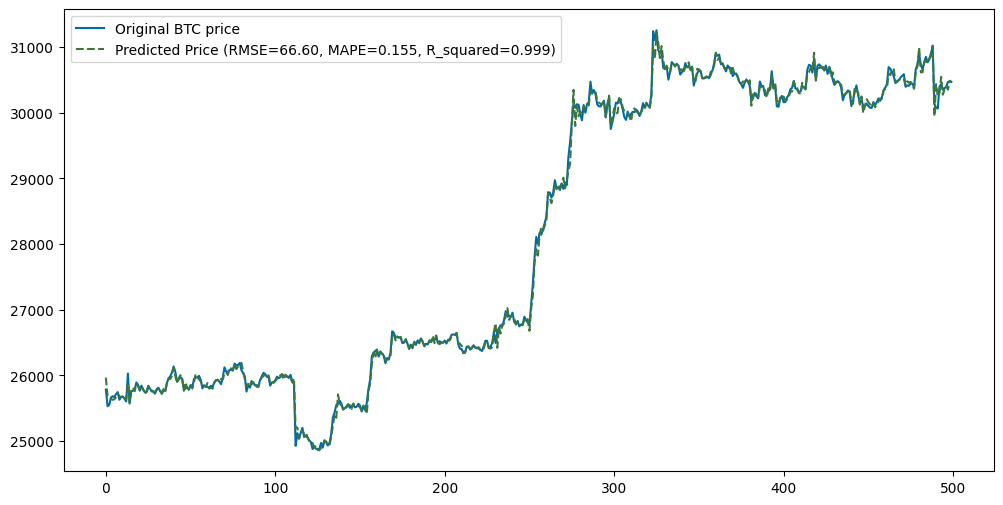

In [92]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y, label = 'Original BTC price');
ax.plot(predictions, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");

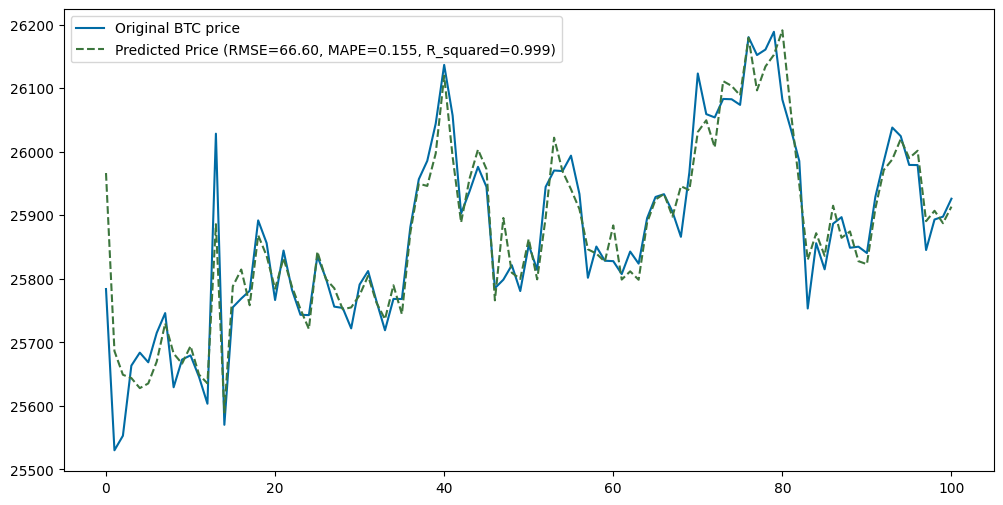

In [91]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(test_y[0:101], label = 'Original BTC price');
ax.plot(predictions[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f}, R_squared={:0.3f})".format(rmse_error, float(mape_error), r2)); 
ax.legend();
ax.set_title("");